PROBLEM

In this project, I will delve deeper into the online retail sector, one of the rapidly developing industries, by analyzing a transactional dataset from a retailer with a branch in the UK, provided by the UCI Machine Learning Repository. This dataset records all transactions from 2010 to 2011.

My main goal is to increase the effectiveness of marketing strategies and boost sales through customer segmentation. I will transform the transactional data into a customer-focused dataset by creating new features to assist in grouping customers into distinct segments using the K-means clustering algorithm.

This segmentation will help me understand the characteristics and behaviors of each customer group. Based on these insights, I will develop a recommendation system that suggests best-selling products to customers in each segment who have not previously purchased those items, thereby enhancing marketing efficiency and driving sales growth.

OBJECTIVES

-Data Cleaning & Transformation:
 Clean the dataset by handling missing values,duplicates, and outliers, preparing it for effective clustering.
-Feature Engineering:
 Develop new features based on the transactional data to create a customer-centric dataset, setting the foundation for customer segmentation.
-Data Preprocessing:
 Undertake feature scaling and dimensionality reduction to streamline the data, enhancing the efficiency of the clustering process.
-Customer Segmentation using K-Means Clustering:
 Segment customers into distinct groups using K-means, facilitating targeted marketing and personalized strategies.

Step 1 | Setup and Initialization

In [76]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("carrie1/ecommerce-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\AORUS 15\.cache\kagglehub\datasets\carrie1\ecommerce-data\versions\1


In [77]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

%matplotlib inline

In [78]:
# Initialize Plotly for use in the notebook
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [79]:
# Configure Seaborn plot styles: Set background color and use white
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='white')

Step 1.2 | Loading the Dataset

In [80]:
df = pd.read_csv("C:/Users/AORUS 15/Desktop/Final Project -CoderSchool/data.csv", encoding="ISO-8859-1")


Dataset Description:
Variable:	Description
InvoiceNo:	Code representing each unique transaction. If this code starts with letter 'c', it indicates a cancellation.
StockCode:	Code uniquely assigned to each distinct product.
Description:	Description of each product.
Quantity:	The number of units of a product in a transaction.
InvoiceDate:	The date and time of the transaction.
UnitPrice:	The unit price of the product in sterling.
CustomerID:	Identifier uniquely assigned to each customer.
Country:	The country of the customer.

Dịch tiếng việt
Biến	Ý nghĩa chi tiết
InvoiceNo	Mã hóa đơn cho mỗi giao dịch. Nếu bắt đầu bằng chữ C (ví dụ: C123456), đó là hóa đơn hủy
StockCode	Mã sản phẩm – định danh duy nhất cho từng loại sản phẩm
Description	Mô tả tên sản phẩm – có thể chứa lỗi chính tả hoặc bị thiếu nếu dữ liệu không sạch
Quantity	Số lượng sản phẩm được mua trong giao dịch. Có thể âm nếu là hoàn trả
InvoiceDate	Ngày giờ thực hiện giao dịch – dùng để phân tích theo thời gian, mùa vụ
UnitPrice	Giá của một đơn vị sản phẩm (tính theo bảng Anh – GBP)
CustomerID	ID của khách hàng – giúp phân tích hành vi từng người, nhưng có thể bị thiếu (NaN)
Country	Quốc gia của khách hàng – có thể dùng cho phân tích theo khu vực, thị trường


Step 2 Initial Data Analysis

In [81]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Dataset Description:

This dataset have 8 columns and 541909 entries

InvoiceNo: This is a column with data type object (string), which contains the invoice number for each transaction.
Each invoice number may represent multiple items purchased in a single transaction.

StockCode: A column of type object, representing the product code for each item.

Description: This is also an object-type column containing product descriptions.
There are some missing values, with only 540,455 valid entries out of 541,909 rows.

Quantity: An integer-type column indicating the number of items purchased per transaction.

InvoiceDate: A datetime-type column that records the date and time of each transaction.

UnitPrice: A float-type column indicating the unit price of each product.

CustomerID: A float-type column containing the customer identifier for each transaction.
This column has many missing values, with only 406,829 valid entries out of 541,909 rows.

Country: An object-type column that records the country where each transaction took place.

 Initial Observations:
There are missing values in the Description and CustomerID columns, which should be addressed during cleaning.

The InvoiceDate column is already in datetime format, which is helpful for time series analysis.

It is observed that a single customer may have multiple transactions, as indicated by the repetition of CustomerID in the initial rows.

***Tiếng việt***
Mô tả Dataset:
InvoiceNo: Đây là một cột có kiểu dữ liệu object (chuỗi), chứa mã hóa đơn cho mỗi giao dịch.
Mỗi mã hóa đơn có thể đại diện cho nhiều mặt hàng được mua trong một giao dịch duy nhất.

StockCode: Cột có kiểu object, đại diện cho mã sản phẩm của từng mặt hàng.

Description: Cột này cũng có kiểu object, chứa mô tả sản phẩm.
Có một số giá trị bị thiếu, với chỉ 540.455 giá trị hợp lệ trên tổng 541.909 dòng.

Quantity: Cột kiểu số nguyên (integer), thể hiện số lượng sản phẩm được mua trong mỗi giao dịch.

InvoiceDate: Cột kiểu datetime, ghi nhận ngày và giờ của mỗi giao dịch.

UnitPrice: Cột kiểu float, biểu thị giá đơn vị của từng sản phẩm.

CustomerID: Cột kiểu float, chứa ID khách hàng cho từng giao dịch.
Cột này có nhiều giá trị bị thiếu, chỉ có 406.829 giá trị hợp lệ trong tổng số 541.909 dòng.

Country: Cột kiểu object, ghi lại quốc gia mà mỗi giao dịch diễn ra.

 Nhận định ban đầu:
Có thiếu dữ liệu ở hai cột: Description và CustomerID → cần xử lý sau.

Cột InvoiceDate đã có định dạng datetime, điều này giúp ích cho việc phân tích chuỗi thời gian (time series).

Quan sát cho thấy một khách hàng có thể có nhiều giao dịch, được xác định nhờ sự lặp lại của CustomerID ở các dòng đầu tiên.

I will go deeper to understand insight of dataset

In [83]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [84]:
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


Conclusion:

Quantity:
The average quantity of products in a transaction is approximately 9.55.
The quantity has a wide range, with a minimum value of -80995 and a maximum value of 80995. The negative values indicate returned or cancelled orders, which need to be handled appropriately.
The standard deviation is quite large, indicating a significant spread in the data. The presence of outliers is indicated by a large difference between the maximum and the 75th percentile values.
UnitPrice:
The average unit price of the products is approximately 4.61.
The unit price also shows a wide range, from -11062.06 to 38970, which suggests the presence of errors or noise in the data, as negative prices don't make sense.
Similar to the Quantity column, the presence of outliers is indicated by a large difference between the maximum and the 75th percentile values.
CustomerID:
There are 406829 non-null entries, indicating missing values in the dataset which need to be addressed.
The Customer IDs range from 12346 to 18287, helping in identifying unique customers.
InvoiceNo:
There are 25900 unique invoice numbers, indicating 25900 separate transactions.
The most frequent invoice number is 573585, appearing 1114 times, possibly representing a large transaction or an order with multiple items.
StockCode:
There are 4070 unique stock codes representing different products.
The most frequent stock code is 85123A, appearing 2313 times in the dataset.
Description:
There are 4223 unique product descriptions.
The most frequent product description is "WHITE HANGING HEART T-LIGHT HOLDER", appearing 2369 times.
There are some missing values in this column which need to be treated.
Country:
The transactions come from 38 different countries, with a dominant majority of the transactions (approximately 91.4%) originating from the United Kingdom.
*** Tiếng Việt***
Quantity:
Quantity: Trung bình 9.55 sản phẩm/giao dịch. Có giá trị âm (trả hàng), dữ liệu phân tán mạnh → cần xử lý outliers.

UnitPrice: Trung bình 4.61. Có giá trị âm và cao bất thường → có thể là lỗi nhập liệu.

CustomerID: Nhiều giá trị thiếu. ID trong khoảng 12346–18287 → dùng để phân tích khách hàng.

InvoiceNo: 25,900 giao dịch. Một số hóa đơn xuất hiện nhiều lần → có thể là đơn hàng lớn.

StockCode: 4,070 mã sản phẩm. Mã phổ biến nhất: 85123A.

Description: 4,223 mô tả khác nhau. Thiếu một số giá trị → cần làm sạch.

Country: 38 quốc gia. ~91.4% giao dịch đến từ United Kingdom.



Step 3 | Data Cleaning & Transformation

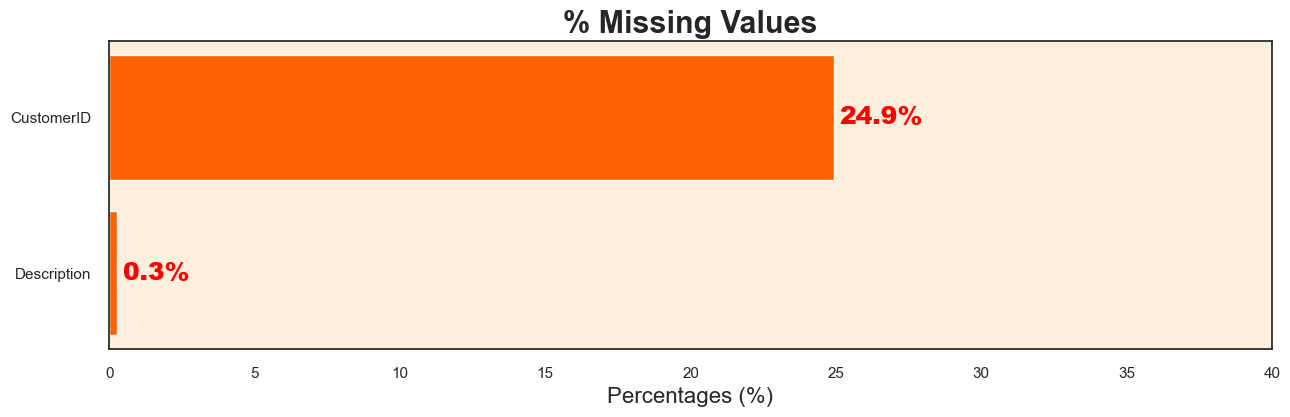

In [85]:
#Handling Missing Values
#tính % của missing values cho mỗi cột
missing_values = df.isnull().sum()
percentage_missing = (missing_values[missing_values>0]/df.shape[0])*100
#sort values
percentage_missing.sort_values(ascending = True , inplace = True)
#vẽ chart để dễ nhìn có bao nhiêu % missing value
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(percentage_missing.index, percentage_missing, color='#ff6200')
#hiển thị các giá trị và chỉ số
for i, (value, name) in enumerate(zip(percentage_missing, percentage_missing.index)):
    ax.text(value + 0.2, i, f"{value:.1f}%", ha='left', va='center', fontweight='black', fontsize=18, color='red')
#set limit
ax.set_xlim([0, 40])

#add title cho chart
plt.title("% Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

Handling Missing Values strategy

*Customer ID (24,9%)
Is because the Customer ID very important and it has 24,9% of missing values. So we can't drop this columns. Customer ID is the most important columns for customer segmentations. We need fill the missing values for the dataset more cleaner.
*Description (0.3%)
This column has a minor percentage of missing values. However, it has been noticed that there are inconsistencies in the data where the same StockCode does not always have the same Description. This indicates data quality issues and potential errors in the product descriptions  

In [86]:
#Trích xuất những dữ liệu bị thiếu CustomerID hoặc Description
df[df['CustomerID'].isnull() | df['Description'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [87]:
#Xóa những dữ liệu của CustomerID và Description
df = df.dropna(subset=['CustomerID', 'Description'])
#Kiểm tra
df.isnull().sum().sum()


np.int64(0)

Step 3.2 Handling Duplicates

In [88]:
# tìm các value duplicate
duplicate_rows = df[df.duplicated(keep=False)]

# sắp xếp lại data
duplicate_rows_sorted = duplicate_rows.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity'])

duplicate_rows_sorted.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom


In [89]:
df.duplicated().sum()

np.int64(5225)

In [90]:
#xóa trực tiếp value duplicates trên df k cần gán lại
df.drop_duplicates(inplace=True)

In [91]:
#đếm số dòng sau khi xóa
df.shape[0]

401604

Step 3.3 | Treating Cancelled Transactions

To refine our understanding of customer behavior and preferences, we need to take into account the transactions that were cancelled. Initially, we will identify these transactions by filtering the rows where the InvoiceNo starts with "C". Subsequently, we will analyze these rows to understand their common characteristics or patterns:
*** Tiếng việt ***
Để hiểu rõ hơn về hành vi và sở thích của khách hàng, chúng ta cần xem xét đến các giao dịch đã bị hủy.

Trước tiên, ta sẽ xác định các giao dịch bị hủy bằng cách lọc những dòng có InvoiceNo bắt đầu bằng chữ "C".

Sau đó, ta sẽ phân tích các dòng này để tìm ra các đặc điểm hoặc xu hướng chung của các giao dịch bị hủy.

In [92]:
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

# Analyze the characteristics of these rows (considering the new column)
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancelled_transactions.describe().drop('CustomerID', axis=1).round(2)

,Quantity,UnitPrice
count,8872.00,8872.00
mean,-30.77,18.90
std,1172.25,445.19
min,-80995.00,0.01
25%,-6.00,1.45
50%,-2.00,2.95
75%,-1.00,4.95
max,-1.00,38970.00


Thông số	Quantity (Số lượng trả)	UnitPrice (Đơn giá sản phẩm)
Số dòng	8,872 giao dịch	8,872 sản phẩm
Trung bình	-30.77 sản phẩm	£18.90
Độ lệch chuẩn	1,172.25 (phân tán lớn)	445.19 (nhiều sản phẩm giá cao)
Giá trị nhỏ nhất	-80,995 sản phẩm	£0.01 (rất rẻ)
25% thấp nhất	-6 sản phẩm	£1.45
Trung vị (50%)	-2 sản phẩm	£2.95
75% cao nhất	-1 sản phẩm	£4.95
Lớn nhất	-1 sản phẩm	£38,970 (rất đắt)

All quantities in the cancelled transactions are negative, indicating that these are indeed orders that were cancelled.
The UnitPrice column has a considerable spread, showing that a variety of products, from low to high value, were part of the cancelled transactions.
*** Tiếng Việt ***
Tất cả các giá trị Quantity trong các giao dịch bị hủy đều là số âm, cho thấy đây thực sự là các đơn hàng đã bị hủy hoặc hoàn trả.

Cột UnitPrice có mức độ phân tán lớn, cho thấy rằng các giao dịch bị hủy bao gồm nhiều loại sản phẩm — từ giá thấp đến giá cao.

Strategy for Handling Cancelled Transactions:
Considering the project's objective to cluster customers based on their purchasing behavior and preferences and to eventually create a recommendation system, it's imperative to understand the cancellation patterns of customers. Therefore, the strategy is to retain these cancelled transactions in the dataset, marking them distinctly to facilitate further analysis. This approach will:

Enhance the clustering process by incorporating patterns and trends observed in cancellation data, which might represent certain customer behaviors or preferences.
Allow the recommendation system to possibly prevent suggesting products that have a high likelihood of being cancelled, thereby improving the quality of recommendations.
*** Tiếng Việt ***
Xét đến mục tiêu của dự án là phân cụm khách hàng dựa trên hành vi và sở thích mua sắm, đồng thời tiến tới việc xây dựng hệ thống gợi ý sản phẩm, việc hiểu rõ các xu hướng hủy đơn hàng của khách hàng là rất quan trọng.
Do đó, chiến lược sẽ là giữ lại các giao dịch bị hủy trong tập dữ liệu, nhưng được đánh dấu riêng biệt để phục vụ cho các phân tích tiếp theo.
Cách tiếp cận này sẽ mang lại lợi ích:
Cải thiện quá trình phân cụm, nhờ vào việc đưa vào các xu hướng và mô hình xuất hiện trong dữ liệu hủy đơn, từ đó nhận diện hành vi đặc trưng của khách hàng.
Giúp hệ thống gợi ý tránh đề xuất những sản phẩm dễ bị hủy, từ đó nâng cao chất lượng khuyến nghị.



In [93]:
cancelled_percentage = (cancelled_transactions.shape[0] / df.shape[0]) * 100

# Printing the percentage of cancelled transactions
print(f"The percentage of cancelled transactions in the dataset is: {cancelled_percentage:.2f}%")

The percentage of cancelled transactions in the dataset is: 2.21%


In [94]:
# tìm kiếm giá trị duy nhất của Stockcode
unique_stock_codes = df['StockCode'].nunique()

print(f"The number of unique stock codes in the dataset is: {unique_stock_codes}")

The number of unique stock codes in the dataset is: 3684


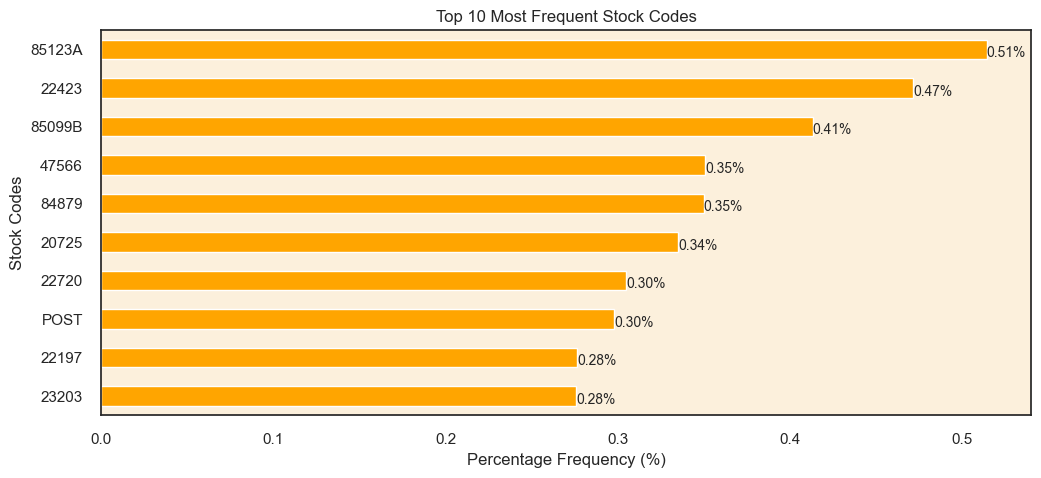

In [95]:
# Finding the top 10 most frequent stock codes
top_10_stock_codes = df['StockCode'].value_counts(normalize=True).head(10) * 100

# Plotting the top 10 most frequent stock codes
plt.figure(figsize=(12, 5))
top_10_stock_codes.plot(kind='barh', color='orange')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_stock_codes):
    plt.text(value, index+0.2, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Stock Codes')
plt.gca().invert_yaxis()
plt.show()

Conclusion:
Product Variety: The dataset contains 3684 unique stock codes, indicating a substantial variety of products available in the online retail store. This diversity can potentially lead to the identification of distinct customer clusters, with preferences for different types of products.
Popular Items: A closer look at the top 10 most frequent stock codes can offer insights into the popular products or categories that are frequently purchased by customers.
Stock Code Anomalies: We observe that while most stock codes are composed of 5 or 6 characters, there are some anomalies like the code 'POST'. These anomalies might represent services or non-product transactions (perhaps postage fees) rather than actual products. To maintain the focus of the project, which is clustering based on product purchases and creating a recommendation system, these anomalies should be further investigated and possibly treated appropriately to ensure data integrity.
*** Tiếng Việt ***
-Dataset chứa 3684 mã sản phẩm duy nhất. Đồng nghĩa việc cửa hàng bán lẻ đó đa dạng sản phẩm.Giúp cho việc xác định cụm khách hàng đa dạng và rộng hơn.Mỗi nhóm có xu hướng ưa thích những loại sản phẩm riêng
-Trên biểu đồ biểu hiện 10 sản phẩm xuất hiện nhiều nhất. Đồng nghĩa đó là những mã sản phẩm mà khách hàng mua thường xuyên
-Tuy nhiên trong khi phần lớn các mã sản phẩm có 5 đến 6 ký tự, có một số ngoại lệ như mã 'POST'.
Những mã như vậy có thể đại diện cho dịch vụ hoặc các giao dịch không phải sản phẩm (ví dụ: phí vận chuyển).
Để giữ đúng trọng tâm của dự án là phân cụm khách hàng dựa trên sản phẩm đã mua và xây dựng hệ thống gợi ý, những bất thường này nên được kiểm tra và xử lý phù hợp để đảm bảo tính toàn vẹn của dữ liệu.

To delve deeper into identifying these anomalies, let's explore the frequency of the number of numeric characters in the stock codes, which can provide insights into the nature of these unusual entries:

In [96]:
# Tìm số lượng ký tự số trong mỗi mã sản phẩm duy nhất (StockCode)
unique_stock_codes = df['StockCode'].unique()
numeric_char_counts_in_unique_codes = pd.Series(unique_stock_codes).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

print("Value counts of numeric character frequencies in unique stock codes:")
print("*-*"*22)
print(numeric_char_counts_in_unique_codes)

Value counts of numeric character frequencies in unique stock codes:
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
5    3676
0       7
1       1
Name: count, dtype: int64


A majority of the unique stock codes (3676 out of 3684) contain exactly 5 numeric characters, which seems to be the standard format for representing product codes in this dataset.
There are a few anomalies: 7 stock codes contain no numeric characters and 1 stock code contains only 1 numeric character. These are clearly deviating from the standard format and need further investigation to understand their nature and whether they represent valid product transactions.
Now, let's identify the stock codes that contain 0 or 1 numeric characters to further understand these anomalies:
*** Tiếng Việt ***
Phần lớn các mã sản phẩm duy nhất (3.676 trên tổng số 3.684) có đúng 5 ký tự là chữ số, điều này dường như là định dạng tiêu chuẩn để biểu diễn mã sản phẩm trong tập dữ liệu này.
Tuy nhiên, có một số bất thường:
7 mã không chứa ký tự số nào
1 mã chỉ chứa đúng 1 ký tự số
👉 Những mã này rõ ràng lệch khỏi định dạng chuẩn và cần được kiểm tra thêm để hiểu bản chất thực sự của chúng — liệu chúng có thực sự là giao dịch sản phẩm hợp lệ hay không.

In [97]:
# Tìm và in ra các mã sản phẩm có 0 hoặc 1 ký tự số
anomalous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0, 1)]

print("Anomalous stock codes:")
print("-"*22)
for code in anomalous_stock_codes:
    print(code)

Anomalous stock codes:
----------------------
POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


Let's calculate the percentage of records with these anomalous stock codes:

In [98]:
# Calculating the percentage of records with these stock codes
percentage_anomalous = (df['StockCode'].isin(anomalous_stock_codes).sum() / len(df)) * 100

# Printing the percentage
print(f"The percentage of records with anomalous stock codes in the dataset is: {percentage_anomalous:.2f}%")

The percentage of records with anomalous stock codes in the dataset is: 0.48%


Conclusion
Based on the analysis, we find that a very small proportion of the records, 0.48%, have anomalous stock codes, which deviate from the typical format observed in the majority of the data. Also, these anomalous codes are just a fraction among all unique stock codes (only 8 out of 3684).

These codes seem to represent non-product transactions like "BANK CHARGES", "POST" (possibly postage fees), etc. Since they do not represent actual products and are a very small proportion of the dataset, including them in the analysis might introduce noise and distort the clustering and recommendation system.
*** Tiếng Việt ***  
Dựa trên phân tích, ta thấy rằng chỉ một tỷ lệ rất nhỏ của các bản ghi (0.48%) có mã sản phẩm bất thường, tức là những mã không tuân theo định dạng chuẩn được quan sát trong phần lớn dữ liệu.
Cụ thể, các mã bất thường này chỉ chiếm 8 trên tổng số 3.684 mã sản phẩm duy nhất.

Những mã này có vẻ như không đại diện cho sản phẩm thực tế, mà là các giao dịch phụ trợ như "BANK CHARGES", "POST" (có thể là phí vận chuyển), v.v.
Vì chúng không phải là sản phẩm thực và chiếm tỷ lệ rất nhỏ trong toàn bộ dữ liệu, nên nếu giữ lại trong quá trình phân tích có thể gây nhiễu và làm sai lệch kết quả phân cụm hoặc hệ thống gợi ý.



Strategy:
Given the context of the project, where the aim is to cluster customers based on their product purchasing behaviors and develop a product recommendation system, it would be prudent to exclude these records with anomalous stock codes from the dataset. This way, the focus remains strictly on genuine product transactions, which would lead to a more accurate and meaningful analysis.

Thus, the strategy would be to filter out and remove rows with these anomalous stock codes from the dataset before proceeding with further analysis and model development:
*** Tiếng Việt *** 
Xét trong bối cảnh của dự án, với mục tiêu là phân cụm khách hàng dựa trên hành vi mua sản phẩm và phát triển hệ thống gợi ý sản phẩm, thì việc loại bỏ các bản ghi có mã sản phẩm bất thường là một lựa chọn hợp lý.
Cách làm này giúp giữ cho quá trình phân tích tập trung hoàn toàn vào các giao dịch sản phẩm thực tế, từ đó mang lại kết quả chính xác và có ý nghĩa hơn.
👉 Do đó, chiến lược là lọc và xóa khỏi tập dữ liệu các dòng có mã sản phẩm bất thường trước khi tiếp tục với các bước phân tích sâu và xây dựng mô hình.

In [99]:
# Loại bỏ những mã khác thường
df = df[~df['StockCode'].isin(anomalous_stock_codes)]

In [100]:
# Getting the number of rows in the dataframe
df.shape[0]

399689

Step 3.5 | Cleaning Description Column

First, I will calculate the occurrence count of each unique description in the dataset. Then, I will plot the top 30 descriptions. This visualization will give a clear view of the highest occurring descriptions in the dataset:

*** Tiếng Việt ***
Trước tiên, tôi sẽ tính số lần xuất hiện của từng mô tả sản phẩm (Description) trong tập dữ liệu.
Sau đó, tôi sẽ vẽ biểu đồ cho 30 mô tả xuất hiện nhiều nhất.
Biểu đồ này sẽ giúp trực quan hóa rõ ràng các mô tả sản phẩm phổ biến nhất trong tập dữ liệu.

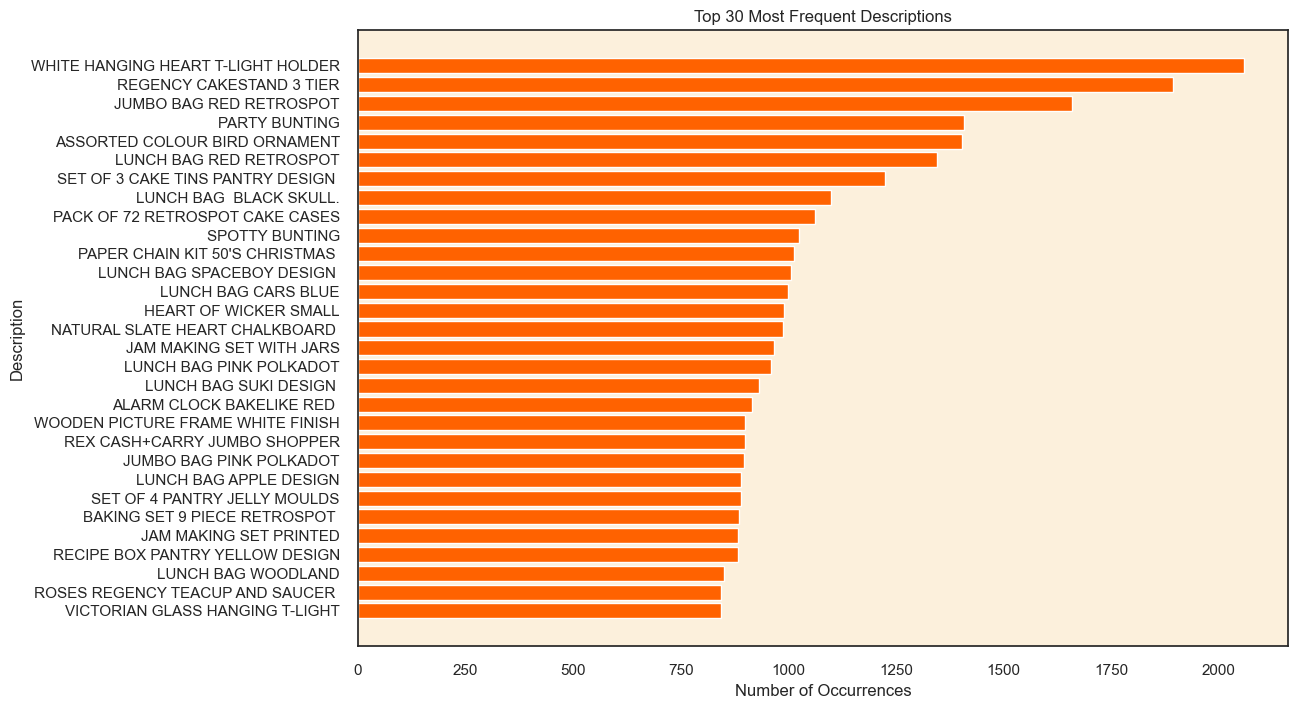

In [101]:
# Calculate the occurrence of each unique description and sort them
description_counts = df['Description'].value_counts()

# Get the top 30 descriptions
top_30_descriptions = description_counts[:30]

# Plotting
plt.figure(figsize=(12,8))
plt.barh(top_30_descriptions.index[::-1], top_30_descriptions.values[::-1], color='#ff6200')

# Adding labels and title
plt.xlabel('Number of Occurrences')
plt.ylabel('Description')
plt.title('Top 30 Most Frequent Descriptions')

# Show the plot
plt.show()

Inferences on Descriptions:
The most frequent descriptions are generally household items, particularly those associated with kitchenware, lunch bags, and decorative items.
Interestingly, all the descriptions are in uppercase, which might be a standardized format for entering product descriptions in the database. However, considering the inconsistencies and anomalies encountered in the dataset so far, it would be prudent to check if there are descriptions entered in lowercase or a mix of case styles.

*** Tiếng Việt ***
Các mô tả xuất hiện nhiều nhất chủ yếu là đồ gia dụng, đặc biệt là các sản phẩm liên quan đến dụng cụ nhà bếp, túi đựng cơm trưa và đồ trang trí.
Đáng chú ý, tất cả mô tả đều được viết hoa (UPPERCASE) — điều này có thể là do quy chuẩn định dạng khi nhập liệu vào cơ sở dữ liệu.
Tuy nhiên, xét đến những bất thường và thiếu nhất quán đã gặp trong tập dữ liệu, nên kiểm tra thêm để xem liệu có tồn tại mô tả nào được nhập bằng chữ thường hoặc pha trộn chữ hoa – chữ thường hay không.

In [102]:
# Lấy các mô tả duy nhất trong cột 'Description'
unique_descriptions = df['Description'].dropna().unique()

# Lọc các mô tả chứa ít nhất một ký tự thường (lowercase)
lowercase_descriptions = [desc for desc in unique_descriptions if any(char.islower() for char in desc)]

# In các mô tả bất thường
print("⚠️ Các mô tả chứa ký tự thường (không viết hoa hoàn toàn):")
print("-" * 60)
for desc in lowercase_descriptions:
    print(desc)

# Lọc toàn bộ các dòng trong df có mô tả thuộc danh sách này
rows_with_lowercase = df[df['Description'].isin(lowercase_descriptions)]

# Thống kê
print(f"\n🧾 Tổng số dòng dữ liệu có mô tả viết không hoàn toàn hoa: {rows_with_lowercase.shape[0]}")
print("\n📋 Một số ví dụ:")
print(rows_with_lowercase[['InvoiceNo', 'StockCode', 'Description']].drop_duplicates().head(10))


⚠️ Các mô tả chứa ký tự thường (không viết hoa hoàn toàn):
------------------------------------------------------------
BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image

🧾 Tổng số dòng dữ liệu có mô tả viết không hoàn toàn hoa: 1379

📋 Một số ví dụ:
     InvoiceNo StockCode                         Description
482     536408     21705             BAG 500g SWIRLY MARBLES
918     536500    46000M        POLYESTER FILLER PAD 45x45cm
2038    536557    46000R        POLYESTER FILLER PAD 45x30cm
2039    5365

Inference:
Upon reviewing the descriptions that contain lowercase characters, it is evident that some entries are not product descriptions, such as "Next Day Carriage" and "High Resolution Image". These entries seem to be unrelated to the actual products and might represent other types of information or service details.
*** Tiếng Việt ***
Sau khi xem xét các mô tả sản phẩm có chứa chữ thường, có thể thấy rằng một số mục không phải là mô tả sản phẩm thực tế, ví dụ như "Next Day Carriage" hay "High Resolution Image".
Những mục này dường như liên quan đến dịch vụ hoặc thông tin phụ trợ, không phải là sản phẩm để bán.

Strategy:
Step 1: Remove the rows where the descriptions contain service-related information like "Next Day Carriage" and "High Resolution Image", as these do not represent actual products and would not contribute to the clustering and recommendation system we aim to build.
Step 2: For the remaining descriptions with mixed case, standardize the text to uppercase to maintain uniformity across the dataset. This will also assist in reducing the chances of having duplicate entries with different case styles.
By implementing the above strategy, we can enhance the quality of our dataset, making it more suitable for the analysis and modeling phases of our project.

*** Tiếng Việt ***
Bước 1:
Loại bỏ các dòng mà mô tả là thông tin dịch vụ như "Next Day Carriage" và "High Resolution Image", vì đây không phải là sản phẩm thực và không đóng góp vào hệ thống phân cụm hoặc gợi ý mà chúng ta đang xây dựng.

Bước 2:
Với các mô tả còn lại có chữ thường hoặc kiểu chữ pha trộn, tiến hành chuẩn hóa tất cả về dạng chữ in hoa (UPPERCASE) để đảm bảo sự đồng nhất trong dữ liệu.
Việc này cũng giúp giảm khả năng trùng lặp mô tả do khác biệt kiểu chữ.

In [103]:
# Danh sách mô tả không phải sản phẩm (dịch vụ)
service_related_descriptions = ["Next Day Carriage", "High Resolution Image"]

# Tính % dòng chứa mô tả dịch vụ
service_related_percentage = (
    df[df['Description'].isin(service_related_descriptions)].shape[0]
    / df.shape[0]
) * 100

# In phần trăm trước khi xử lý
print(f"The percentage of records with service-related descriptions in the dataset is: {service_related_percentage:.2f}%")

# Xoá các dòng có mô tả dịch vụ
df = df[~df['Description'].isin(service_related_descriptions)]

# Chuẩn hóa mô tả còn lại về viết hoa
df['Description'] = df['Description'].str.upper()


The percentage of records with service-related descriptions in the dataset is: 0.02%


In [104]:
df.shape[0]

399606

Step 3.6 | Treating Zero Unit Prices

In [105]:
df['UnitPrice'].describe()

count    399606.000000
mean          2.904957
std           4.448796
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

Inference:
The minimum unit price value is zero. This suggests that there are some transactions where the unit price is zero, potentially indicating a free item or a data entry error. To understand their nature, it is essential to investigate these zero unit price transactions further. A detailed analysis of the product descriptions associated with zero unit prices will be conducted to determine if they adhere to a specific pattern:
*** Tiếng Việt ***
Nhận định:
Min của cột Unit Price là 0. Điều đó có nghĩa là có một số giao dịch 0 đồng, có thể là sản phẩm được tặng miễn phí hoặc bị lỗi nhập liệu.
Để hiểu rõ bản chất của các giao dịch này, cần phân tích sâu hơn các dòng có đơn giá bằng 0.
Cụ thể, sẽ tiến hành phân tích chi tiết mô tả sản phẩm (Description) tương ứng để xem có tuân theo một mẫu (pattern) cụ thể nào không.

In [106]:
df[df['UnitPrice']==0].describe()[['Quantity']]

,Quantity
count,33.000000
mean,420.515152
std,2176.713608
min,1.000000
25%,2.000000
50%,11.000000
75%,36.000000
max,12540.000000


Inferences on UnitPrice:
The transactions with a unit price of zero are relatively few in number (33 transactions).
These transactions have a large variability in the quantity of items involved, ranging from 1 to 12540, with a substantial standard deviation.
Including these transactions in the clustering analysis might introduce noise and could potentially distort the customer behavior patterns identified by the clustering algorithm.
*** Tiếng Việt ***
Số lượng giao dịch có đơn giá bằng 0 là khá ít (chỉ có 33 giao dịch).
Tuy nhiên, những giao dịch này có mức độ biến động lớn về số lượng sản phẩm, dao động từ 1 đến 12.540 sản phẩm, với độ lệch chuẩn rất cao.
Việc giữ lại những giao dịch này trong quá trình phân cụm (clustering) có thể gây nhiễu và làm sai lệch mô hình nhận diện hành vi khách hàng mà thuật toán phân cụm tạo ra.

Strategy:
Given the small number of these transactions and their potential to introduce noise in the data analysis, the strategy should be to remove these transactions from the dataset. This would help in maintaining a cleaner and more consistent dataset, which is essential for building an accurate and reliable clustering model and recommendation system.
*** Tiếng Việt ***
Xét thấy số lượng các giao dịch này là rất nhỏ và có khả năng gây nhiễu cho quá trình phân tích dữ liệu, chiến lược hợp lý là loại bỏ những giao dịch này khỏi tập dữ liệu.

Việc này sẽ giúp duy trì một tập dữ liệu sạch và nhất quán hơn, điều này là cực kỳ quan trọng để xây dựng một mô hình phân cụm (clustering) và hệ thống gợi ý (recommendation) chính xác và đáng tin cậy.

In [107]:
# Xóa các bản ghi có đơn giá bằng 0 để tránh lỗi nhập liệu tiềm ẩn.
df = df[df['UnitPrice'] > 0]

Step 3.7 | Outlier Treatment

In K-means clustering, the algorithm is sensitive to both the scale of data and the presence of outliers, as they can significantly influence the position of centroids, potentially leading to incorrect cluster assignments. However, considering the context of this project where the final goal is to understand customer behavior and preferences through K-means clustering, it would be more prudent to address the issue of outliers after the feature engineering phase where we create a customer-centric dataset. At this stage, the data is transactional, and removing outliers might eliminate valuable information that could play a crucial role in segmenting customers later on. Therefore, we will postpone the outlier treatment and proceed to the next stage for now.
*** Tiếng Việt ***
Trong phân cụm K-means, thuật toán rất nhạy cảm với cả quy mô dữ liệu lẫn sự hiện diện của các giá trị ngoại lai (outliers), vì chúng có thể ảnh hưởng đáng kể đến vị trí các tâm cụm (centroids), dẫn đến việc phân cụm sai lệch.
Tuy nhiên, xét trong bối cảnh dự án này — nơi mà mục tiêu cuối cùng là hiểu hành vi và sở thích của khách hàng thông qua K-means — thì việc xử lý outlier nên được thực hiện sau giai đoạn xây dựng đặc trưng (feature engineering), khi ta đã có dữ liệu tập trung theo khách hàng.
Ở giai đoạn hiện tại, dữ liệu vẫn ở cấp độ giao dịch, và việc loại bỏ các giá trị ngoại lai quá sớm có thể dẫn đến mất đi những thông tin quan trọng, mà sau này có thể đóng vai trò then chốt trong việc phân khúc khách hàng.
👉 Do đó, việc xử lý outlier sẽ được hoãn lại, và chúng ta sẽ tiếp tục chuyển sang bước tiếp theo trong quá trình xử lý dữ liệu.


In [108]:
# Resetting the index of the cleaned dataset
df.reset_index(drop=True, inplace=True)
# Getting the number of rows in the dataframe
df.shape[0]

399573

Step 4 | Feature Engineering

In order to create a comprehensive customer-centric dataset for clustering and recommendation, the following features can be engineered from the available data:

Step 4.1 | RFM Features

RFM is a method used for analyzing customer value and segmenting the customer base. It is an acronym that stands for:

Recency (R): This metric indicates how recently a customer has made a purchase. A lower recency value means the customer has purchased more recently, indicating higher engagement with the brand.
Frequency (F): This metric signifies how often a customer makes a purchase within a certain period. A higher frequency value indicates a customer who interacts with the business more often, suggesting higher loyalty or satisfaction.
Monetary (M): This metric represents the total amount of money a customer has spent over a certain period. Customers who have a higher monetary value have contributed more to the business, indicating their potential high lifetime value.
Together, these metrics help in understanding a customer's buying behavior and preferences, which is pivotal in personalizing marketing strategies and creating a recommendation system.
*** Tiếng Việt ***
RFM là một phương pháp được sử dụng để phân tích giá trị khách hàng và phân khúc tập khách hàng. Tên gọi "RFM" là viết tắt của ba yếu tố:
🔹 Recency (R) – Gần đây nhất:
Chỉ ra khách hàng đã mua hàng gần đây đến mức nào.
Giá trị R càng thấp → khách hàng mua hàng càng gần đây → thể hiện mức độ tương tác cao với thương hiệu.
🔹 Frequency (F) – Tần suất mua hàng:
Cho biết khách hàng mua hàng bao nhiêu lần trong một khoảng thời gian nhất định.
Tần suất càng cao → khách hàng càng thường xuyên quay lại → thể hiện sự trung thành hoặc hài lòng cao.
🔹 Monetary (M) – Giá trị tiền chi tiêu:
Là tổng số tiền khách hàng đã chi tiêu trong một khoảng thời gian.
Giá trị M càng cao → khách hàng đóng góp doanh thu lớn hơn → tiềm năng trở thành khách hàng có giá trị cao trong dài hạn.
✅ Khi kết hợp ba chỉ số này, bạn có thể hiểu rõ hành vi và giá trị của khách hàng, từ đó cá nhân hóa chiến lược marketing và xây dựng hệ thống gợi ý phù hợp hơn.

Step 4.1.1 | Recency (R)

In this step, we focus on understanding how recently a customer has made a purchase. This is a crucial aspect of customer segmentation as it helps in identifying the engagement level of customers. Here, I am going to define the following feature:

Days Since Last Purchas: This feature represents the number of days that have passed since the customer's last purchase. A lower value indicates that the customer has purchased recently, implying a higher engagement level with the business, whereas a higher value may indicate a lapse or decreased engagement. By understanding the recency of purchases, businesses can tailor their marketing strategies to re-engage customers who have not made purchases in a while, potentially increasing customer retention and fostering loyalty.
*** Tiếng Việt ***
Trong bước này, chúng ta sẽ tập trung vào việc hiểu mức độ gần đây mà khách hàng đã thực hiện giao dịch mua hàng. Đây là một yếu tố quan trọng trong việc phân khúc khách hàng vì nó giúp xác định mức độ tương tác của khách hàng với doanh nghiệp.
🏷 Days Since Last Purchase (Số ngày kể từ lần mua hàng gần nhất):
Đây là một đặc trưng thể hiện số ngày đã trôi qua kể từ lần mua hàng cuối cùng của khách hàng.
Giá trị thấp cho thấy khách hàng vừa mua hàng gần đây, phản ánh mức độ tương tác cao với doanh nghiệp.
Ngược lại, giá trị cao có thể là dấu hiệu của sự ngừng tương tác hoặc mức độ quan tâm giảm sút.
✅ Việc hiểu rõ tính "gần đây" trong hành vi mua hàng sẽ giúp doanh nghiệp:
Tùy chỉnh chiến lược marketing, đặc biệt là
Tái tương tác với các khách hàng đã lâu không mua hàng,
Từ đó tăng tỷ lệ giữ chân khách hàng và xây dựng lòng trung thành.

In [109]:
# Chuyển cột InvoiceDate sang kiểu dữ liệu datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Trích xuất phần ngày (bỏ giờ) từ InvoiceDate và lưu vào cột mới InvoiceDay
df['InvoiceDay'] = df['InvoiceDate'].dt.date

# Tìm ngày mua hàng gần nhất của mỗi khách hàng
customer_data = df.groupby('CustomerID')['InvoiceDay'].max().reset_index()

# Tìm ngày giao dịch gần nhất trong toàn bộ tập dữ liệu
most_recent_date = df['InvoiceDay'].max()

# Chuyển cột InvoiceDay về kiểu datetime trước khi thực hiện phép trừ
customer_data['InvoiceDay'] = pd.to_datetime(customer_data['InvoiceDay'])
most_recent_date = pd.to_datetime(most_recent_date)

# Tính số ngày kể từ lần mua hàng gần nhất của mỗi khách hàng
customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['InvoiceDay']).dt.days

# Xoá cột InvoiceDay vì đã tính xong Recency
customer_data.drop(columns=['InvoiceDay'], inplace=True)


In [110]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


I've named the customer-centric dataframe as customer_data, which will eventually contain all the customer-based features we plan to create.
Tôi đã đặt tên cho dataframe tập trung vào khách hàng là customer_data, mà cuối cùng sẽ chứa tất cả các đặc điểm dựa trên khách hàng mà chúng tôi dự định tạo ra.

Step 4.1.2 | Frequency (F)

In this step, I am going to create two features that quantify the frequency of a customer's engagement with the retailer:

Total Transactions: This feature represents the total number of transactions made by a customer. It helps in understanding the engagement level of a customer with the retailer.
Total Products Purchased: This feature indicates the total number of products (sum of quantities) purchased by a customer across all transactions. It gives an insight into the customer's buying behavior in terms of the volume of products purchased.
These features will be crucial in segmenting customers based on their buying frequency, which is a key aspect in determining customer segments for targeted marketing and personalized recommendations.
*** Tiếng Việt ***
Trong bước này, tôi sẽ tạo ra hai đặc trưng nhằm định lượng mức độ tương tác của khách hàng với nhà bán lẻ:
🔹 Tổng số giao dịch (Total Transactions):
Đặc trưng này thể hiện tổng số lần giao dịch mà một khách hàng đã thực hiện.
Nó giúp đánh giá mức độ tương tác của khách hàng với doanh nghiệp.
🔹 Tổng số sản phẩm đã mua (Total Products Purchased):
Đặc trưng này cho biết tổng số lượng sản phẩm (tổng Quantity) mà khách hàng đã mua qua tất cả các giao dịch.
Nó phản ánh hành vi mua sắm của khách hàng về mặt khối lượng sản phẩm.
✅ Hai đặc trưng này sẽ đóng vai trò quan trọng trong việc phân khúc khách hàng dựa trên tần suất mua hàng, đây là yếu tố then chốt để xây dựng các chiến dịch marketing nhắm mục tiêu và hệ thống gợi ý cá nhân hóa.

In [111]:
# Tính tổng số giao dịch mà mỗi khách hàng đã thực hiện
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)

# Tính tổng số lượng sản phẩm mà mỗi khách hàng đã mua
total_products_purchased = df.groupby('CustomerID')['Quantity'].sum().reset_index()
total_products_purchased.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)

# Gộp (merge) các đặc trưng mới vào bảng customer_data theo CustomerID
customer_data = pd.merge(customer_data, total_transactions, on='CustomerID')
customer_data = pd.merge(customer_data, total_products_purchased, on='CustomerID')

# Hiển thị vài dòng đầu tiên của bảng customer_data sau khi cập nhật
customer_data.head()


,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased
0,12346.0,325,2,0
1,12347.0,2,7,2458
2,12348.0,75,4,2332
3,12349.0,18,1,630
4,12350.0,310,1,196


Step 4.1.3 | Monetary (M)  

In this step, I am going to create two features that represent the monetary aspect of customer's transactions:

Total Spend: This feature represents the total amount of money spent by each customer. It is calculated as the sum of the product of UnitPrice and Quantity for all transactions made by a customer. This feature is crucial as it helps in identifying the total revenue generated by each customer, which is a direct indicator of a customer's value to the business.
Average Transaction Value: This feature is calculated as the Total Spend divided by the Total Transactions for each customer. It indicates the average value of a transaction carried out by a customer. This metric is useful in understanding the spending behavior of customers per transaction, which can assist in tailoring marketing strategies and offers to different customer segments based on their average spending patterns.
*** Tiếng Việt ***
Trong bước này, tôi sẽ tạo ra hai đặc trưng phản ánh khía cạnh chi tiêu (monetary) của các giao dịch của khách hàng:
🔹 Tổng chi tiêu (Total Spend):
Đặc trưng này biểu thị tổng số tiền mà mỗi khách hàng đã chi tiêu.
Nó được tính bằng tổng của (UnitPrice × Quantity) trên tất cả các giao dịch của khách hàng.
Đây là một đặc trưng quan trọng vì nó giúp xác định tổng doanh thu mà khách hàng mang lại, và là chỉ báo trực tiếp về giá trị của khách hàng đối với doanh nghiệp.
🔹 Giá trị giao dịch trung bình (Average Transaction Value):
Đặc trưng này được tính bằng Tổng chi tiêu chia cho Tổng số giao dịch của mỗi khách hàng.
Nó cho biết giá trị trung bình của mỗi giao dịch mà khách hàng thực hiện.
Chỉ số này rất hữu ích trong việc hiểu hành vi chi tiêu theo từng lần mua, từ đó hỗ trợ xây dựng các chiến lược marketing và ưu đãi phù hợp cho từng nhóm khách hàng dựa trên mô hình chi tiêu trung bình của họ.

In [112]:
# Tính tổng chi tiêu của mỗi khách hàng
df['Total_Spend'] = df['UnitPrice'] * df['Quantity']
total_spend = df.groupby('CustomerID')['Total_Spend'].sum().reset_index()

# Tính giá trị giao dịch trung bình của mỗi khách hàng
average_transaction_value = total_spend.merge(total_transactions, on='CustomerID')
average_transaction_value['Average_Transaction_Value'] = average_transaction_value['Total_Spend'] / average_transaction_value['Total_Transactions']

# Gộp các đặc trưng mới vào bảng customer_data theo CustomerID
customer_data = pd.merge(customer_data, total_spend, on='CustomerID')
customer_data = pd.merge(customer_data, average_transaction_value[['CustomerID', 'Average_Transaction_Value']], on='CustomerID')

# Hiển thị vài dòng đầu tiên của bảng customer_data sau khi cập nhật
customer_data.head()


,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value
0,12346.0,325,2,0,0.00,0.000000
1,12347.0,2,7,2458,4310.00,615.714286
2,12348.0,75,4,2332,1437.24,359.310000
3,12349.0,18,1,630,1457.55,1457.550000
4,12350.0,310,1,196,294.40,294.400000


In this step, we are going to understand the diversity in the product purchase behavior of customers. Understanding product diversity can help in crafting personalized marketing strategies and product recommendations. Here, I am going to define the following feature:

Unique Products Purchased: This feature represents the number of distinct products bought by a customer. A higher value indicates that the customer has a diverse taste or preference, buying a wide range of products, while a lower value might indicate a focused or specific preference. Understanding the diversity in product purchases can help in segmenting customers based on their buying diversity, which can be a critical input in personalizing product recommendations.
*** Tiếng Việt ***
Trong bước này, chúng ta sẽ tìm hiểu sự đa dạng trong hành vi mua sản phẩm của khách hàng.
Việc hiểu được mức độ đa dạng sản phẩm mà khách hàng mua có thể giúp doanh nghiệp thiết kế các chiến lược marketing cá nhân hóa và đề xuất sản phẩm phù hợp hơn.
🔹 Số lượng sản phẩm khác nhau đã mua (Unique Products Purchased):
Đặc trưng này biểu thị số lượng sản phẩm khác nhau mà một khách hàng đã mua.
Giá trị cao cho thấy khách hàng có thị hiếu đa dạng, mua nhiều loại sản phẩm khác nhau.
Giá trị thấp có thể phản ánh khách hàng có sở thích cụ thể hoặc mua tập trung vào một vài mặt hàng nhất định.
✅ Việc phân tích mức độ đa dạng trong hành vi mua hàng sẽ giúp phân nhóm khách hàng dựa trên độ phong phú trong lựa chọn sản phẩm, từ đó trở thành yếu tố quan trọng trong việc cá nhân hóa gợi ý sản phẩm.

In [113]:
# Tính số lượng sản phẩm khác nhau mà mỗi khách hàng đã mua
unique_products_purchased = df.groupby('CustomerID')['StockCode'].nunique().reset_index()
unique_products_purchased.rename(columns={'StockCode': 'Unique_Products_Purchased'}, inplace=True)

# Gộp đặc trưng mới vào bảng customer_data theo CustomerID
customer_data = pd.merge(customer_data, unique_products_purchased, on='CustomerID')

# Hiển thị vài dòng đầu tiên của bảng customer_data sau khi cập nhật
customer_data.head()


,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased
0,12346.0,325,2,0,0.00,0.000000,1
1,12347.0,2,7,2458,4310.00,615.714286,103
2,12348.0,75,4,2332,1437.24,359.310000,21
3,12349.0,18,1,630,1457.55,1457.550000,72
4,12350.0,310,1,196,294.40,294.400000,16


Step 4.3 | Behavioral Features

In this step, we aim to understand and capture the shopping patterns and behaviors of customers. These features will give us insights into the customers' preferences regarding when they like to shop, which can be crucial information for personalizing their shopping experience. Here are the features I am planning to introduce:

Average Days Between Purchases: This feature represents the average number of days a customer waits before making another purchase. Understanding this can help in predicting when the customer is likely to make their next purchase, which can be a crucial metric for targeted marketing and personalized promotions.
Favorite Shopping Day: This denotes the day of the week when the customer shops the most. This information can help in identifying the preferred shopping days of different customer segments, which can be used to optimize marketing strategies and promotions for different days of the week.
Favorite Shopping Hour: This refers to the hour of the day when the customer shops the most. Identifying the favorite shopping hour can aid in optimizing the timing of marketing campaigns and promotions to align with the times when different customer segments are most active.
By including these behavioral features in our dataset, we can create a more rounded view of our customers, which will potentially enhance the effectiveness of the clustering algorithm, leading to more meaningful customer segments.
*** Tiếng Việt ***
🎯 Trong bước này, chúng ta sẽ tìm hiểu và ghi nhận các mô hình mua sắm (shopping patterns) cũng như hành vi của khách hàng.
Những đặc trưng này sẽ cung cấp cái nhìn sâu hơn về thói quen và sở thích mua sắm của khách hàng, từ đó giúp cá nhân hóa trải nghiệm mua sắm một cách hiệu quả hơn.
🔹 Số ngày trung bình giữa các lần mua (Average Days Between Purchases):
Đặc trưng này phản ánh số ngày trung bình mà khách hàng chờ giữa các lần mua hàng.
Hiểu được khoảng cách giữa các giao dịch giúp dự đoán thời điểm khách hàng có thể mua lần tiếp theo, hỗ trợ hiệu quả cho các chiến dịch marketing nhắm mục tiêu và khuyến mãi cá nhân hóa.
🔹 Ngày mua sắm ưa thích (Favorite Shopping Day):
Đây là ngày trong tuần mà khách hàng mua hàng nhiều nhất.
Thông tin này giúp xác định ngày khách hàng thường mua sắm, từ đó tối ưu hóa các chiến dịch marketing và chương trình khuyến mãi theo từng ngày trong tuần.
🔹 Giờ mua sắm ưa thích (Favorite Shopping Hour):
Đây là giờ trong ngày mà khách hàng hay mua hàng nhất.
Việc xác định khung giờ mua sắm ưa thích giúp doanh nghiệp điều chỉnh thời điểm chạy quảng cáo, email, ưu đãi... đúng lúc khách hàng có khả năng tương tác cao nhất.
✅ Việc bổ sung các đặc trưng hành vi này vào tập dữ liệu sẽ giúp hiểu khách hàng một cách toàn diện hơn, từ đó nâng cao hiệu quả của thuật toán phân cụm và tạo ra những nhóm khách hàng có ý nghĩa và hành động rõ ràng hơn.

In [114]:
# Trích xuất ngày trong tuần và giờ trong ngày từ cột InvoiceDate
df['Day_Of_Week'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

# Tính số ngày trung bình giữa các lần mua hàng liên tiếp của mỗi khách hàng
days_between_purchases = df.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()
average_days_between_purchases.rename(columns={'InvoiceDay': 'Average_Days_Between_Purchases'}, inplace=True)

# Tìm ngày trong tuần mà mỗi khách hàng mua hàng nhiều nhất (ngày mua sắm ưa thích)
favorite_shopping_day = df.groupby(['CustomerID', 'Day_Of_Week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_Of_Week']]

# Tìm giờ trong ngày mà mỗi khách hàng mua hàng nhiều nhất (giờ mua sắm ưa thích)
favorite_shopping_hour = df.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]

# Gộp các đặc trưng hành vi mới vào bảng customer_data theo CustomerID
customer_data = pd.merge(customer_data, average_days_between_purchases, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_day, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_hour, on='CustomerID')

# Hiển thị vài dòng đầu tiên của bảng customer_data sau khi cập nhật
customer_data.head()


,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16


Step 4.4 | Geographic Features

In this step, we will introduce a geographic feature that reflects the geographical location of customers. Understanding the geographic distribution of customers is pivotal for several reasons:

Country: This feature identifies the country where each customer is located. Including the country data can help us understand region-specific buying patterns and preferences. Different regions might have varying preferences and purchasing behaviors which can be critical in personalizing marketing strategies and inventory planning. Furthermore, it can be instrumental in logistics and supply chain optimization, particularly for an online retailer where shipping and delivery play a significant role.
*** Tiếng Việt ***
Trong bước này, chúng ta sẽ thêm một đặc trưng về vị trí địa lý phản ánh khu vực sinh sống của khách hàng.
Việc hiểu rõ phân bố địa lý của khách hàng là rất quan trọng vì nhiều lý do sau:
🔹 Quốc gia (Country):
Đặc trưng này cho biết khách hàng đến từ quốc gia nào.
Việc đưa dữ liệu quốc gia vào sẽ giúp chúng ta hiểu được các xu hướng mua sắm và sở thích theo khu vực.
Mỗi khu vực có thể có sở thích, hành vi mua hàng khác nhau, ảnh hưởng đến chiến lược marketing cá nhân hóa.
Dữ liệu quốc gia còn giúp lập kế hoạch tồn kho chính xác hơn, phù hợp với nhu cầu tại từng vùng.
Ngoài ra, nó đóng vai trò quan trọng trong tối ưu hóa logistics và chuỗi cung ứng, đặc biệt với các nhà bán lẻ trực tuyến, nơi vận chuyển và giao hàng là yếu tố then chốt.



In [115]:
df['Country'].value_counts(normalize=True).head()

Country
United Kingdom    0.890971
Germany           0.022722
France            0.020402
EIRE              0.018440
Spain             0.006162
Name: proportion, dtype: float64

Inference:
Given that a substantial portion (89%) of transactions are originating from the United Kingdom, we might consider creating a binary feature indicating whether the transaction is from the UK or not. This approach can potentially streamline the clustering process without losing critical geographical information, especially when considering the application of algorithms like K-means which are sensitive to the dimensionality of the feature space.
*** Tiếng Việt ***
Vì một tỷ lệ lớn (89%) các giao dịch đến từ Vương quốc Anh (United Kingdom), nên chúng ta có thể cân nhắc tạo một biến nhị phân để biểu thị liệu một giao dịch có đến từ UK hay không.
Cách tiếp cận này có thể giúp đơn giản hóa quá trình phân cụm, mà không làm mất đi thông tin địa lý quan trọng — đặc biệt hữu ích khi áp dụng các thuật toán như K-means, vốn nhạy cảm với số chiều (dimensionality) của không gian đặc trưng.

Methodology:
-First, I will group the data by CustomerID and Country and calculate the number of transactions per country for each customer.
-Next, I will identify the main country for each customer (the country from which they have the maximum transactions).
-Then, I will create a binary column indicating whether the customer is from the UK or not.
-Finally, I will merge this information with the customer_data dataframe to include the new feature in our analysis.
*** Tiếng Việt ***
Đầu tiên, tôi sẽ group dữ liệu theo CustomerID và Country, sau đó tính số lượng giao dịch tại mỗi quốc gia đối với từng khách hàng.
Tiếp theo, tôi sẽ xác định quốc gia chính của mỗi khách hàng — tức là quốc gia mà họ thực hiện nhiều giao dịch nhất.
Sau đó, tôi sẽ tạo một cột nhị phân (binary column) để xác định khách hàng có đến từ Vương quốc Anh (UK) hay không.
Cuối cùng, tôi sẽ gộp (merge) thông tin này vào bảng customer_data để bổ sung đặc trưng địa lý mới cho quá trình phân tích.

In [116]:
# Nhóm dữ liệu theo CustomerID và Country để tính số giao dịch tại mỗi quốc gia cho từng khách hàng
customer_country = df.groupby(['CustomerID', 'Country']).size().reset_index(name='Number_of_Transactions')

# Lấy quốc gia có số lượng giao dịch nhiều nhất cho mỗi khách hàng (trường hợp khách hàng có nhiều quốc gia khác nhau)
customer_main_country = customer_country.sort_values('Number_of_Transactions', ascending=False).drop_duplicates('CustomerID')

# Tạo cột nhị phân để xác định khách hàng có đến từ UK hay không (1 nếu là UK, ngược lại là 0)
customer_main_country['Is_UK'] = customer_main_country['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)

# Gộp thông tin quốc gia chính của khách hàng vào bảng customer_data
customer_data = pd.merge(customer_data, customer_main_country[['CustomerID', 'Is_UK']], on='CustomerID', how='left')

# Hiển thị vài dòng đầu tiên của bảng customer_data sau khi cập nhật
customer_data.head()


,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16,0


In [117]:
customer_data['Is_UK'].value_counts()


Is_UK
1    3866
0     416
Name: count, dtype: int64

Step 4.5 | Cancellation Insights

In this step, I am going to delve deeper into the cancellation patterns of customers to gain insights that can enhance our customer segmentation model. The features I am planning to introduce are:

Cancellation Frequency: This metric represents the total number of transactions a customer has canceled. Understanding the frequency of cancellations can help us identify customers who are more likely to cancel transactions. This could be an indicator of dissatisfaction or other issues, and understanding this can help us tailor strategies to reduce cancellations and enhance customer satisfaction.
Cancellation Rate: This represents the proportion of transactions that a customer has canceled out of all their transactions. This metric gives a normalized view of cancellation behavior. A high cancellation rate might be indicative of an unsatisfied customer segment. By identifying these segments, we can develop targeted strategies to improve their shopping experience and potentially reduce the cancellation rate.
By incorporating these cancellation insights into our dataset, we can build a more comprehensive view of customer behavior, which could potentially aid in creating more effective and nuanced customer segmentation.
*** Tiếng Việt ***
Trong bước này, tôi sẽ đi sâu vào phân tích các mẫu hành vi hủy đơn hàng của khách hàng nhằm thu thập những thông tin có thể nâng cao hiệu quả mô hình phân khúc khách hàng.
🔹 Tần suất hủy đơn (Cancellation Frequency):
Chỉ số này thể hiện tổng số giao dịch mà khách hàng đã hủy.
Việc hiểu rõ tần suất hủy đơn sẽ giúp xác định những khách hàng có xu hướng hay hủy đơn hàng, điều này có thể là dấu hiệu của sự không hài lòng hoặc các vấn đề phát sinh khác.
Việc phát hiện sớm các hành vi này giúp doanh nghiệp điều chỉnh chiến lược để giảm thiểu tỷ lệ hủy đơn và tăng sự hài lòng của khách hàng.
🔹 Tỷ lệ hủy đơn (Cancellation Rate):
Đây là tỷ lệ giữa số lượng đơn bị hủy và tổng số giao dịch của khách hàng.
Chỉ số này cung cấp một cái nhìn chuẩn hóa về hành vi hủy đơn.
Tỷ lệ hủy cao có thể là dấu hiệu cho thấy một phân khúc khách hàng không hài lòng, từ đó doanh nghiệp có thể xây dựng chiến lược nhắm mục tiêu cụ thể để cải thiện trải nghiệm mua sắm và giảm tỷ lệ hủy.
✅ Việc tích hợp các thông tin về hành vi hủy đơn vào tập dữ liệu sẽ giúp xây dựng một bức tranh toàn diện hơn về hành vi khách hàng, từ đó hỗ trợ phân khúc chính xác và hiệu quả hơn.

In [118]:
# Tính tổng số giao dịch của mỗi khách hàng
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Lọc các giao dịch bị hủy (Transaction_Status = 'Cancelled') và tính số lượng giao dịch bị hủy của mỗi khách hàng
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancellation_frequency = cancelled_transactions.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancellation_frequency.rename(columns={'InvoiceNo': 'Cancellation_Frequency'}, inplace=True)

# Gộp số lượng hủy đơn vào bảng customer_data theo CustomerID
customer_data = pd.merge(customer_data, cancellation_frequency, on='CustomerID', how='left')

# Thay thế giá trị NaN bằng 0 (với những khách hàng không hủy đơn nào)
customer_data['Cancellation_Frequency'].fillna(0, inplace=True)

# Tính tỷ lệ hủy đơn = số đơn bị hủy / tổng số giao dịch
customer_data['Cancellation_Rate'] = customer_data['Cancellation_Frequency'] / total_transactions['InvoiceNo']

# Hiển thị vài dòng đầu tiên của bảng customer_data sau khi cập nhật
customer_data.head()


,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.5
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.0
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0,0.0,0.0
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.0
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16,0,0.0,0.0


Step 4.6 | Seasonality & Trends

In this step, I will delve into the seasonality and trends in customers' purchasing behaviors, which can offer invaluable insights for tailoring marketing strategies and enhancing customer satisfaction. Here are the features I am looking to introduce:

Monthly_Spending_Mean: This is the average amount a customer spends monthly. It helps us gauge the general spending habit of each customer. A higher mean indicates a customer who spends more, potentially showing interest in premium products, whereas a lower mean might indicate a more budget-conscious customer.
Monthly_Spending_Std: This feature indicates the variability in a customer's monthly spending. A higher value signals that the customer's spending fluctuates significantly month-to-month, perhaps indicating sporadic large purchases. In contrast, a lower value suggests more stable, consistent spending habits. Understanding this variability can help in crafting personalized promotions or discounts during periods they are expected to spend more.
Spending_Trend: This reflects the trend in a customer's spending over time, calculated as the slope of the linear trend line fitted to their spending data. A positive value indicates an increasing trend in spending, possibly pointing to growing loyalty or satisfaction. Conversely, a negative trend might signal decreasing interest or satisfaction, highlighting a need for re-engagement strategies. A near-zero value signifies stable spending habits. Recognizing these trends can help in developing strategies to either maintain or alter customer spending patterns, enhancing the effectiveness of marketing campaigns.
By incorporating these detailed insights into our customer segmentation model, we can create more precise and actionable customer groups, facilitating the development of highly targeted marketing strategies and promotions
*** Tiếng Việt ***
Trong bước này, tôi sẽ phân tích sâu hơn về yếu tố mùa vụ (seasonality) và xu hướng (trend) trong hành vi chi tiêu của khách hàng, điều này có thể cung cấp những hiểu biết vô cùng giá trị để tùy chỉnh chiến lược marketing và nâng cao sự hài lòng của khách hàng.
Dưới đây là các đặc trưng tôi dự định đưa vào:
🔹 Monthly_Spending_Mean (Chi tiêu trung bình theo tháng):
Đây là giá trị chi tiêu trung bình hàng tháng của mỗi khách hàng.
Nó giúp chúng ta đánh giá thói quen chi tiêu tổng thể của khách.
Giá trị trung bình cao cho thấy khách hàng chi tiêu nhiều, có thể quan tâm đến sản phẩm cao cấp.
Ngược lại, giá trị thấp cho thấy khách hàng có xu hướng chi tiêu tiết kiệm hơn.
🔹 Monthly_Spending_Std (Độ lệch chuẩn chi tiêu hàng tháng):
Đặc trưng này phản ánh mức độ dao động trong chi tiêu hàng tháng của khách hàng.
Độ lệch chuẩn cao nghĩa là khách hàng chi tiêu không ổn định, có thể có các giao dịch lớn bất thường.
Độ lệch chuẩn thấp cho thấy khách hàng có thói quen chi tiêu đều đặn, ổn định.
Việc hiểu được độ biến động này sẽ giúp thiết kế khuyến mãi cá nhân hóa, đặc biệt vào các thời điểm khách có xu hướng chi tiêu cao hơn.
🔹 Spending_Trend (Xu hướng chi tiêu):
Đặc trưng này phản ánh xu hướng thay đổi chi tiêu theo thời gian của mỗi khách hàng,
được tính bằng độ dốc của đường hồi quy tuyến tính dựa trên dữ liệu chi tiêu theo thời gian.
Giá trị dương → xu hướng chi tiêu tăng dần, có thể là dấu hiệu của sự trung thành hoặc hài lòng tăng
Giá trị âm → xu hướng giảm chi tiêu, có thể báo hiệu sự giảm quan tâm hoặc không hài lòng
Gần bằng 0 → thói quen chi tiêu ổn định
Việc nhận diện xu hướng này sẽ giúp doanh nghiệp duy trì hoặc điều chỉnh hành vi chi tiêu, từ đó tăng hiệu quả các chiến dịch marketing.
✅ Bằng cách tích hợp các đặc trưng chi tiết trên vào mô hình phân khúc khách hàng, chúng ta có thể xây dựng các nhóm khách hàng chính xác và hành động được hơn, từ đó thiết kế các chiến lược marketing và khuyến mãi được cá nhân hóa tối đa.

In [119]:
# Trích xuất năm và tháng từ cột InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Tính tổng chi tiêu hàng tháng của mỗi khách hàng
monthly_spending = df.groupby(['CustomerID', 'Year', 'Month'])['Total_Spend'].sum().reset_index()

# Tính đặc trưng mua sắm theo mùa: sử dụng chi tiêu hàng tháng để biểu diễn hành vi mùa vụ
seasonal_buying_patterns = monthly_spending.groupby('CustomerID')['Total_Spend'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)

# Thay giá trị NaN trong Monthly_Spending_Std bằng 0 (áp dụng cho khách chỉ mua trong 1 tháng)
seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

# Tính xu hướng chi tiêu theo thời gian
# Sử dụng độ dốc (slope) của đường hồi quy tuyến tính để biểu diễn xu hướng chi tiêu của khách

def calculate_trend(spend_data):
    # Nếu có nhiều hơn 1 điểm dữ liệu, tính độ dốc của đường hồi quy tuyến tính
    if len(spend_data) > 1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x, spend_data)
        return slope
    # Nếu chỉ có 1 điểm dữ liệu thì không thể tính được xu hướng, trả về 0
    else:
        return 0

# Áp dụng hàm calculate_trend để tính xu hướng chi tiêu cho từng khách hàng
spending_trends = monthly_spending.groupby('CustomerID')['Total_Spend'].apply(calculate_trend).reset_index()
spending_trends.rename(columns={'Total_Spend': 'Spending_Trend'}, inplace=True)

# Gộp các đặc trưng mới vào bảng customer_data
customer_data = pd.merge(customer_data, seasonal_buying_patterns, on='CustomerID')
customer_data = pd.merge(customer_data, spending_trends, on='CustomerID')

# Hiển thị vài dòng đầu tiên của bảng customer_data sau khi cập nhật
customer_data.head()


,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.5,0.000000,0.000000,0.000000
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.0,615.714286,341.070789,4.486071
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0,0.0,0.0,359.310000,203.875689,-100.884000
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.0,1457.550000,0.000000,0.000000
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16,0,0.0,0.0,294.400000,0.000000,0.000000


We've done a great job so far! We have created a dataset that focuses on our customers, using a variety of new features that give us a deeper understanding of their buying patterns and preferences.
*** Tiếng Việt ***
Chúng ta đã hoàn thành một công việc tuyệt vời cho đến thời điểm này!
Chúng ta đã tạo ra một tập dữ liệu tập trung vào khách hàng, sử dụng nhiều đặc trưng mới giúp hiểu sâu hơn về hành vi mua sắm và sở thích của họ.

In [120]:
# Chuyển kiểu dữ liệu của 'CustomerID' thành chuỗi (string) vì đây là mã định danh, không dùng để tính toán
customer_data['CustomerID'] = customer_data['CustomerID'].astype(str)

# Tự động chuyển đổi kiểu dữ liệu các cột sang kiểu tối ưu nhất (ví dụ: int -> Int64, float -> Float64, object -> string,...)
customer_data = customer_data.convert_dtypes()


In [121]:
customer_data.head(10)

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,325,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0
1,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789,4.486071
2,12348.0,75,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,0.0,359.31,203.875689,-100.884
3,12349.0,18,1,630,1457.55,1457.55,72,0.0,0,9,0,0,0.0,1457.55,0.0,0.0
4,12350.0,310,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0,0.0
5,12352.0,36,8,463,1265.41,158.17625,57,3.13253,1,14,0,1,0.125,316.3525,134.700629,9.351
6,12353.0,204,1,20,89.0,89.0,4,0.0,3,17,0,0,0.0,89.0,0.0,0.0
7,12354.0,232,1,530,1079.4,1079.4,58,0.0,3,13,0,0,0.0,1079.4,0.0,0.0
8,12355.0,214,1,240,459.4,459.4,13,0.0,0,13,0,0,0.0,459.4,0.0,0.0
9,12356.0,22,3,1573,2487.43,829.143333,52,5.315789,1,9,0,0,0.0,829.143333,991.462585,-944.635


In [122]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282 entries, 0 to 4281
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      4282 non-null   string 
 1   Days_Since_Last_Purchase        4282 non-null   Int64  
 2   Total_Transactions              4282 non-null   Int64  
 3   Total_Products_Purchased        4282 non-null   Int64  
 4   Total_Spend                     4282 non-null   Float64
 5   Average_Transaction_Value       4282 non-null   Float64
 6   Unique_Products_Purchased       4282 non-null   Int64  
 7   Average_Days_Between_Purchases  4282 non-null   Float64
 8   Day_Of_Week                     4282 non-null   Int32  
 9   Hour                            4282 non-null   Int32  
 10  Is_UK                           4282 non-null   Int64  
 11  Cancellation_Frequency          4282 non-null   Int64  
 12  Cancellation_Rate               42

Customer Dataset Description:
Variable	Description
CustomerID	Identifier uniquely assigned to each customer, used to distinguish individual customers.
Days_Since_Last_Purchase	The number of days that have passed since the customer's last purchase.
Total_Transactions	The total number of transactions made by the customer.
Total_Products_Purchased	The total quantity of products purchased by the customer across all transactions.
Total_Spend	The total amount of money the customer has spent across all transactions.
Average_Transaction_Value	The average value of the customer's transactions, calculated as total spend divided by the number of transactions.
Unique_Products_Purchased	The number of different products the customer has purchased.
Average_Days_Between_Purchases	The average number of days between consecutive purchases made by the customer.
Day_Of_Week	The day of the week when the customer prefers to shop, represented numerically (0 for Monday, 6 for Sunday).
Hour	The hour of the day when the customer prefers to shop, represented in a 24-hour format.
Is_UK	A binary variable indicating whether the customer is based in the UK (1) or not (0).
Cancellation_Frequency	The total number of transactions that the customer has cancelled.
Cancellation_Rate	The proportion of transactions that the customer has cancelled, calculated as cancellation frequency divided by total transactions.
Monthly_Spending_Mean	The average monthly spending of the customer.
Monthly_Spending_Std	The standard deviation of the customer's monthly spending, indicating the variability in their spending pattern.
Spending_Trend	A numerical representation of the trend in the customer's spending over time. A positive value indicates an increasing trend, a negative value indicates a decreasing trend, and a value close to zero indicates a stable trend.

We've done a great job so far! We have created a dataset that focuses on our customers, using a variety of new features that give us a deeper understanding of their buying patterns and preferences.

Now that our dataset is ready, we can move on to the next steps of our project. This includes looking at our data more closely to find any patterns or trends, making sure our data is in the best shape by checking for and handling any outliers, and preparing our data for the clustering process. All of these steps will help us build a strong foundation for creating our customer segments and, eventually, a personalized recommendation system.
*** Tiếng Việt ***
Chúng ta đã làm rất tốt cho đến thời điểm này!
Chúng ta đã tạo ra một tập dữ liệu tập trung vào khách hàng, với nhiều đặc trưng mới giúp chúng ta hiểu sâu hơn về hành vi mua sắm và sở thích của họ.
Giờ đây khi tập dữ liệu đã sẵn sàng, chúng ta có thể chuyển sang các bước tiếp theo của dự án. Điều này bao gồm:
Xem xét dữ liệu kỹ hơn để tìm ra các mẫu (patterns) hoặc xu hướng (trends)
Đảm bảo chất lượng dữ liệu bằng cách kiểm tra và xử lý các giá trị ngoại lai (outliers)
Chuẩn bị dữ liệu cho quá trình phân cụm (clustering)
Tất cả các bước này sẽ giúp chúng ta xây dựng một nền tảng vững chắc để:
Tạo ra các phân khúc khách hàng có ý nghĩa
Và cuối cùng là phát triển một hệ thống gợi ý cá nhân hóa hiệu quả.

Step 5 | Outlier Detection and Treatment

In this section, I will identify and handle outliers in our dataset. Outliers are data points that are significantly different from the majority of other points in the dataset. These points can potentially skew the results of our analysis, especially in k-means clustering where they can significantly influence the position of the cluster centroids. Therefore, it is essential to identify and treat these outliers appropriately to achieve more accurate and meaningful clustering results.

Given the multi-dimensional nature of the data, it would be prudent to use algorithms that can detect outliers in multi-dimensional spaces. I am going to use the Isolation Forest algorithm for this task. This algorithm works well for multi-dimensional data and is computationally efficient. It isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Let's proceed with this approach:
*** Tiếng Việt ***
Trong phần này, tôi sẽ nhận diện và xử lý các giá trị ngoại lai (outliers) trong tập dữ liệu.
Outlier là những điểm dữ liệu khác biệt đáng kể so với phần lớn các điểm còn lại trong tập dữ liệu.
Những điểm này có thể làm sai lệch kết quả phân tích, đặc biệt là trong phương pháp phân cụm K-means, nơi mà outliers có thể ảnh hưởng mạnh đến vị trí của các tâm cụm (centroids).
→ Do đó, việc xác định và xử lý outliers một cách phù hợp là rất cần thiết để thu được kết quả phân cụm chính xác và có ý nghĩa hơn.
🔍 Vì dữ liệu của chúng ta có nhiều chiều (multi-dimensional), nên sẽ hợp lý hơn nếu sử dụng các thuật toán có khả năng phát hiện outliers trong không gian nhiều chiều.
Tôi sẽ sử dụng thuật toán Isolation Forest để thực hiện nhiệm vụ này.
Thuật toán này hoạt động tốt với dữ liệu nhiều chiều
Có hiệu suất tính toán cao
Cơ chế hoạt động: cô lập điểm dữ liệu bằng cách chọn ngẫu nhiên một đặc trưng, rồi chọn một giá trị phân tách ngẫu nhiên giữa giá trị lớn nhất và nhỏ nhất của đặc trưng đó.
➡ Hãy cùng triển khai phương pháp này nhé!

In [123]:
#kiểm tra có bao nhiêu cột
df.shape[1]


15

In [124]:
#kiểm tra customer_data có bao nhiêu cột có kiểu dữ liệu số
print("Tổng số chiều số:", customer_data.select_dtypes(include='number').shape[1])

Tổng số chiều số: 15


In [125]:
# Khởi tạo mô hình IsolationForest với tham số contamination = 0.05 (tức là giả định 5% dữ liệu là outlier)
model = IsolationForest(contamination=0.05, random_state=0)

# Huấn luyện mô hình trên dữ liệu (chuyển DataFrame thành NumPy để tránh cảnh báo)
customer_data['Outlier_Scores'] = model.fit_predict(customer_data.iloc[:, 1:].to_numpy())


In [126]:
# Tạo cột mới 'Is_Outlier' để dễ hiểu hơn: 1 nếu là outlier, 0 nếu không phải
customer_data['Is_Outlier'] = [1 if x == -1 else 0 for x in customer_data['Outlier_Scores']]
# Hiển thị vài dòng đầu tiên sau khi thêm thông tin outlier
customer_data.head()


,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,Outlier_Scores,Is_Outlier
0,12346.0,325,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0,1,0
1,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789,4.486071,1,0
2,12348.0,75,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,0.0,359.31,203.875689,-100.884,1,0
3,12349.0,18,1,630,1457.55,1457.55,72,0.0,0,9,0,0,0.0,1457.55,0.0,0.0,1,0
4,12350.0,310,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0,0.0,1,0


After applying the Isolation Forest algorithm, we have identified the outliers and marked them in a new column named Is_Outlier. We have also calculated the outlier scores which represent the anomaly score of each record.

Now let's visualize the distribution of these scores and the number of inliers and outliers detected by the model:
*** Tiếng Việt ***
Sau khi áp dụng thuật toán Isolation Forest, chúng ta đã xác định được các giá trị ngoại lai (outliers) và đánh dấu chúng trong một cột mới có tên là Is_Outlier.
Chúng ta cũng đã tính toán điểm bất thường (outlier scores), phản ánh mức độ bất thường của từng bản ghi trong tập dữ liệu.
📊 Bây giờ, hãy trực quan hóa phân bố của các điểm số này, cũng như số lượng điểm bình thường (inliers) và điểm ngoại lai (outliers) mà mô hình đã phát hiện.

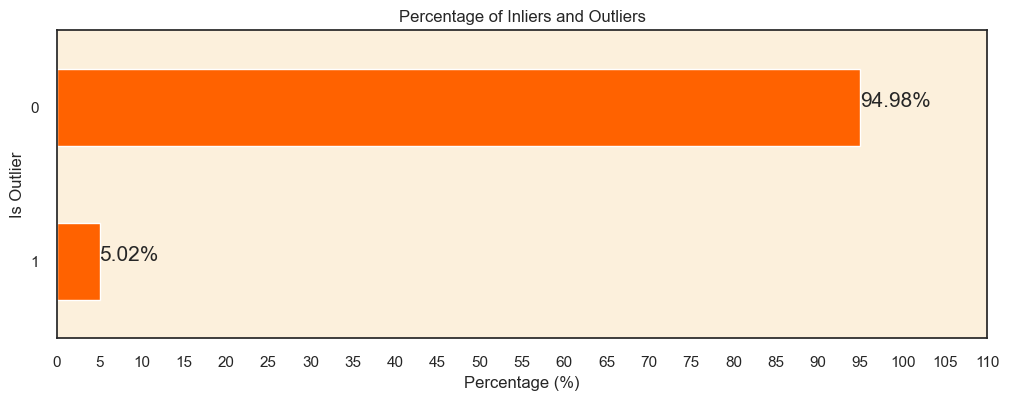

In [127]:
# Tính % của inliers và outliers
outlier_percentage = customer_data['Is_Outlier'].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 4))
outlier_percentage.plot(kind='barh', color='#ff6200')


for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

Inference:
From the above plot, we can observe that about 5% of the customers have been identified as outliers in our dataset. This percentage seems to be a reasonable proportion, not too high to lose a significant amount of data, and not too low to retain potentially noisy data points. It suggests that our isolation forest algorithm has worked well in identifying a moderate percentage of outliers, which will be critical in refining our customer segmentation.
*** Tiếng Việt ***
 Nhận định:
Từ biểu đồ ở trên, chúng ta có thể thấy rằng khoảng 5% khách hàng đã được xác định là outliers trong tập dữ liệu.
Tỷ lệ này có vẻ hợp lý:
Không quá cao đến mức loại bỏ nhiều dữ liệu quan trọng
Cũng không quá thấp đến mức giữ lại nhiều điểm nhiễu
Điều này cho thấy thuật toán Isolation Forest đã hoạt động hiệu quả, xác định được một tỷ lệ vừa phải các ngoại lệ, điều này rất quan trọng để nâng cao độ chính xác của mô hình phân cụm khách hàng sau này.

Strategy:
Considering the nature of the project (customer segmentation using clustering), it is crucial to handle these outliers to prevent them from affecting the clusters' quality significantly. Therefore, I will separate these outliers for further analysis and remove them from our main dataset to prepare it for the clustering analysis.

Let's proceed with the following steps:

Separate the identified outliers for further analysis and save them as a separate file (optional).
Remove the outliers from the main dataset to prevent them from influencing the clustering process.
Drop the Outlier_Scores and Is_Outlier columns as they were auxiliary columns used for the outlier detection process.
Let's implement these steps:
*** Tiếng Việt ***
Chiến lược:
Xét trong bối cảnh của dự án (phân cụm khách hàng bằng clustering), việc xử lý outliers là rất quan trọng để:
Ngăn chúng làm sai lệch các cụm phân nhóm
Tăng chất lượng và độ chính xác của kết quả phân cụm
Vì vậy, tôi sẽ thực hiện các bước sau:
Tách riêng các outliers để phục vụ cho phân tích chuyên sâu sau này (có thể lưu ra file riêng – tùy chọn)
Loại bỏ các outliers khỏi tập dữ liệu chính để chuẩn bị cho quá trình phân cụm
Xóa các cột phụ trợ (Outlier_Scores và Is_Outlier) vì chúng chỉ được dùng cho bước phát hiện outlier
🎯 Hãy cùng thực hiện các bước này!

In [128]:
# Tách các dòng được đánh dấu là outlier ra để phân tích riêng
outliers_data = customer_data[customer_data['Is_Outlier'] == 1]
# Loại bỏ các outliers khỏi tập dữ liệu chính để chuẩn bị cho bước phân cụm
customer_data_cleaned = customer_data[customer_data['Is_Outlier'] == 0]
# Xóa các cột phụ trợ dùng để xác định outliers vì không còn cần thiết nữa
customer_data_cleaned = customer_data_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])
# Đặt lại chỉ số dòng cho bảng dữ liệu đã được làm sạch
customer_data_cleaned.reset_index(drop=True, inplace=True)

We have successfully separated the outliers for further analysis and cleaned our main dataset by removing these outliers. This cleaned dataset is now ready for the next steps in our customer segmentation project, which includes scaling the features and applying clustering algorithms to identify distinct customer segments.
*** Tiếng Việt ***
Chúng ta đã tách thành công các giá trị ngoại lai (outliers) để phân tích riêng, đồng thời làm sạch tập dữ liệu chính bằng cách loại bỏ những outliers này.
Tập dữ liệu sau khi làm sạch hiện đã sẵn sàng cho các bước tiếp theo trong dự án phân khúc khách hàng, bao gồm:
Chuẩn hóa các đặc trưng (scaling features)
Áp dụng thuật toán phân cụm (clustering) để xác định các nhóm khách hàng khác biệt.

Step 6 | Correlation Analysis

Before we proceed to KMeans clustering, it's essential to check the correlation between features in our dataset. The presence of multicollinearity, where features are highly correlated, can potentially affect the clustering process by not allowing the model to learn the actual underlying patterns in the data, as the features do not provide unique information. This could lead to clusters that are not well-separated and meaningful.

If we identify multicollinearity, we can utilize dimensionality reduction techniques like PCA. These techniques help in neutralizing the effect of multicollinearity by transforming the correlated features into a new set of uncorrelated variables, preserving most of the original data's variance. This step not only enhances the quality of clusters formed but also makes the clustering process more computationally efficient.
*** Tiếng Việt ***
Trước khi tiến hành phân cụm KMeans, điều quan trọng là phải kiểm tra mối tương quan giữa các đặc trưng (features) trong tập dữ liệu. Sự xuất hiện của hiện tượng đa cộng tuyến (multicollinearity), tức là khi các đặc trưng có mối tương quan cao với nhau, có thể ảnh hưởng tiêu cực đến quá trình phân cụm vì mô hình sẽ không học được các mẫu thực sự có ý nghĩa trong dữ liệu – do các đặc trưng không cung cấp thông tin độc lập.

Nếu phát hiện có hiện tượng đa cộng tuyến, chúng ta có thể sử dụng các kỹ thuật giảm chiều như PCA (Phân tích thành phần chính). Các kỹ thuật này giúp trung hòa tác động của đa cộng tuyến bằng cách biến đổi các đặc trưng có liên quan với nhau thành một tập hợp mới gồm các biến không tương quan, trong khi vẫn giữ lại phần lớn phương sai (variance) của dữ liệu gốc. Bước này không chỉ cải thiện chất lượng của các cụm được tạo ra, mà còn giúp quá trình phân cụm trở nên hiệu quả hơn về mặt tính toán.

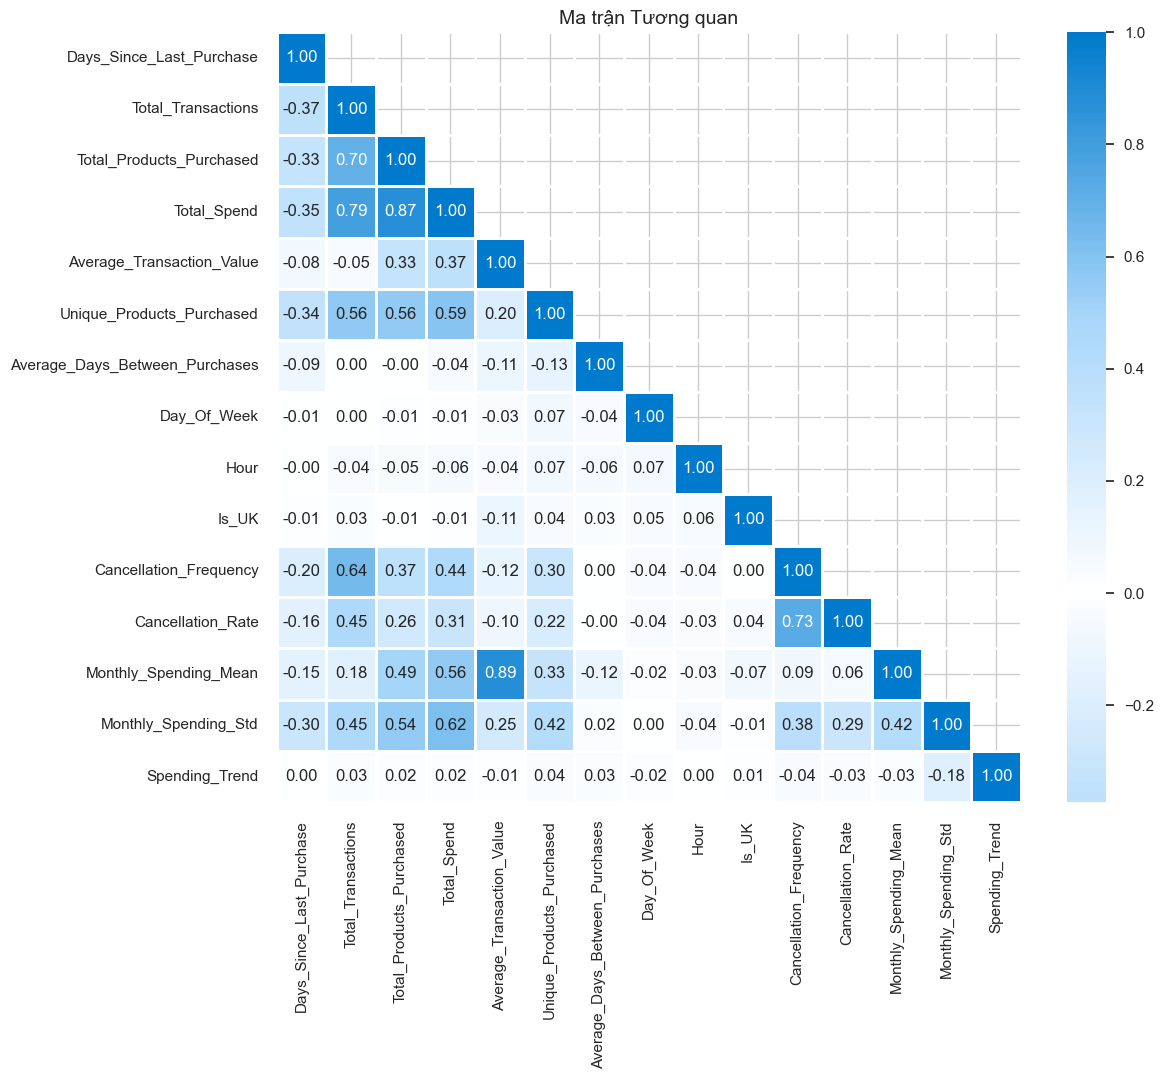

In [129]:
# Đặt lại kiểu nền cho biểu đồ
sns.set_style('whitegrid')

# Tính ma trận tương quan, loại bỏ cột 'CustomerID'
corr = customer_data_cleaned.drop(columns=['CustomerID']).corr()

# Định nghĩa bảng màu tùy chỉnh
colors = ['#007acc', '#a6d5fa', 'white', '#a6d5fa', '#007acc']
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

# Tạo mặt nạ để chỉ hiển thị tam giác dưới của ma trận (vì ma trận tương quan đối xứng qua đường chéo chính)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

# Vẽ biểu đồ heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Ma trận Tương quan', fontsize=14)
plt.show()


Inference:
Looking at the heatmap, we can see that there are some pairs of variables that have high correlations, for instance:

Monthly_Spending_Mean and Average_Transaction_Value
Total_Spend and Total_Products_Purchased
Total_Transactions and Total_Spend
Cancellation_Rate and Cancellation_Frequency
Total_Transactions and Total_Products_Purchased
These high correlations indicate that these variables move closely together, implying a degree of multicollinearity.

Before moving to the next steps, considering the impact of multicollinearity on KMeans clustering, it might be beneficial to treat this multicollinearity possibly through dimensionality reduction techniques such as PCA to create a set of uncorrelated variables. This will help in achieving more stable clusters during the KMeans clustering process.

*** Tiếng Việt ***
Kết luận:
Khi quan sát biểu đồ heatmap, chúng ta có thể thấy rằng có một số cặp biến có hệ số tương quan cao, ví dụ như:
Monthly_Spending_Mean và Average_Transaction_Value
Total_Spend và Total_Products_Purchased
Total_Transactions và Total_Spend
Cancellation_Rate và Cancellation_Frequency
Total_Transactions và Total_Products_Purchased
Những mối tương quan cao này cho thấy các biến có xu hướng thay đổi đồng thời, hàm ý rằng tồn tại hiện tượng đa cộng tuyến (multicollinearity).
Trước khi chuyển sang các bước tiếp theo, xét đến ảnh hưởng của đa cộng tuyến đối với thuật toán phân cụm KMeans, sẽ rất hữu ích nếu xử lý hiện tượng này bằng các kỹ thuật giảm chiều như PCA. PCA sẽ giúp tạo ra một tập hợp các biến không còn tương quan với nhau, từ đó giúp việc phân cụm trở nên ổn định hơn và có ý nghĩa hơn.

Step 7 | Feature Scaling

Before we move forward with the clustering and dimensionality reduction, it's imperative to scale our features. This step holds significant importance, especially in the context of distance-based algorithms like K-means and dimensionality reduction methods like PCA. Here's why:

For K-means Clustering: K-means relies heavily on the concept of 'distance' between data points to form clusters. When features are not on a similar scale, features with larger values can disproportionately influence the clustering outcome, potentially leading to incorrect groupings.
For PCA: PCA aims to find the directions where the data varies the most. When features are not scaled, those with larger values might dominate these components, not accurately reflecting the underlying patterns in the data.
*** Tiếng Việt ***
Trước khi tiến hành các bước phân cụm và giảm chiều, việc chuẩn hóa (scale) các đặc trưng là điều bắt buộc. Bước này đặc biệt quan trọng khi làm việc với các thuật toán dựa trên khoảng cách như K-means và các phương pháp giảm chiều như PCA. Lý do như sau:
Đối với phân cụm K-means:
K-means dựa rất nhiều vào khái niệm "khoảng cách" giữa các điểm dữ liệu để hình thành các cụm. Khi các đặc trưng không được đưa về cùng một thang đo, những đặc trưng có giá trị lớn hơn có thể chi phối kết quả phân cụm, từ đó dẫn đến việc phân nhóm không chính xác.
Đối với PCA:
PCA tìm các hướng (thành phần chính) mà trong đó dữ liệu có độ biến thiên lớn nhất. Nếu không chuẩn hóa, các đặc trưng có giá trị lớn hơn sẽ chi phối các thành phần chính này, và kết quả sẽ không phản ánh đúng cấu trúc tiềm ẩn của dữ liệu.

Methodology:
Therefore, to ensure a balanced influence on the model and to reveal the true patterns in the data, I am going to standardize our data, meaning transforming the features to have a mean of 0 and a standard deviation of 1. However, not all features require scaling. Here are the exceptions and the reasons why they are excluded:

CustomerID: This feature is just an identifier for the customers and does not contain any meaningful information for clustering.
Is_UK: This is a binary feature indicating whether the customer is from the UK or not. Since it already takes a value of 0 or 1, scaling it won't make any significant difference.
Day_Of_Week: This feature represents the most frequent day of the week that the customer made transactions. Since it's a categorical feature represented by integers (1 to 7), scaling it would not be necessary.
I will proceed to scale the other features in the dataset to prepare it for PCA and K-means clustering.

In [130]:
# Khởi tạo bộ chuẩn hóa StandardScaler
scaler = StandardScaler()

# Danh sách các cột không cần chuẩn hóa
columns_to_exclude = ['CustomerID', 'Is_UK', 'Day_Of_Week']

# Danh sách các cột cần được chuẩn hóa
columns_to_scale = customer_data_cleaned.columns.difference(columns_to_exclude)

# Sao chép tập dữ liệu đã làm sạch
customer_data_scaled = customer_data_cleaned.copy()

# Áp dụng bộ chuẩn hóa cho các cột cần thiết trong tập dữ liệu
customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])

# Hiển thị vài dòng đầu tiên của dữ liệu đã được chuẩn hóa
customer_data_scaled.head()


,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,2.345802,-0.477589,-0.754491,-0.813464,-1.317106,-0.908471,-0.310564,1,-1.086929,1,0.420541,0.417623,-1.329018,-0.713318,0.090868
1,12347.0,-0.905575,0.707930,2.005048,2.366920,1.528132,0.815119,-0.128438,1,0.647126,0,-0.545753,-0.432111,0.989511,1.259961,0.116774
2,12348.0,-0.170744,-0.003381,1.863591,0.247087,0.343279,-0.570512,0.672476,3,2.814696,0,-0.545753,-0.432111,0.023997,0.466213,-0.491708
3,12349.0,-0.744516,-0.714692,-0.047205,0.262074,5.418285,0.291283,-0.310564,0,-1.520443,0,-0.545753,-0.432111,4.159521,-0.713318,0.090868
4,12350.0,2.194809,-0.714692,-0.534446,-0.596223,0.043327,-0.655002,-0.310564,2,1.514154,0,-0.545753,-0.432111,-0.220428,-0.713318,0.090868


Step 8 | Dimensionality Reduction

Why We Need Dimensionality Reduction?
Multicollinearity Detected: In the previous steps, we identified that our dataset contains multicollinear features. Dimensionality reduction can help us remove redundant information and alleviate the multicollinearity issue.
Better Clustering with K-means: Since K-means is a distance-based algorithm, having a large number of features can sometimes dilute the meaningful underlying patterns in the data. By reducing the dimensionality, we can help K-means to find more compact and well-separated clusters.
Noise Reduction: By focusing only on the most important features, we can potentially remove noise in the data, leading to more accurate and stable clusters.
Enhanced Visualization: In the context of customer segmentation, being able to visualize customer groups in two or three dimensions can provide intuitive insights. Dimensionality reduction techniques can facilitate this by reducing the data to a few principal components which can be plotted easily.
Improved Computational Efficiency: Reducing the number of features can speed up the computation time during the modeling process, making our clustering algorithm more efficient.
Let's proceed to select an appropriate dimensionality reduction method to our data.
*** Tiếng Việt ***
Tại sao cần giảm chiều dữ liệu?
Phát hiện đa cộng tuyến: Ở các bước trước, chúng ta đã xác định rằng tập dữ liệu có chứa các đặc trưng có mối tương quan cao (đa cộng tuyến). Việc giảm chiều có thể giúp loại bỏ thông tin dư thừa và làm giảm tác động của hiện tượng đa cộng tuyến.
Cải thiện phân cụm với K-means: Vì K-means là thuật toán dựa trên khoảng cách, nên khi có quá nhiều đặc trưng, các mẫu dữ liệu có thể trở nên khó phân biệt rõ ràng. Giảm chiều giúp thuật toán K-means xác định các cụm chặt chẽ và tách biệt hơn.
Giảm nhiễu: Bằng cách chỉ tập trung vào những đặc trưng quan trọng nhất, ta có thể loại bỏ phần nhiễu trong dữ liệu, từ đó nâng cao độ chính xác và sự ổn định của các cụm.
Cải thiện khả năng trực quan hóa: Trong bối cảnh phân khúc khách hàng, việc có thể trực quan hóa các nhóm khách hàng trên không gian 2 hoặc 3 chiều mang lại nhiều trực giác và hiểu biết hơn. Các kỹ thuật giảm chiều như PCA giúp rút gọn dữ liệu thành vài thành phần chính dễ vẽ biểu đồ.
Tăng hiệu quả tính toán: Việc giảm số lượng đặc trưng giúp giảm thời gian xử lý trong quá trình huấn luyện mô hình, từ đó giúp thuật toán phân cụm hoạt động hiệu quả hơn.

Which Dimensionality Reduction Method?
In this step, we are considering the application of dimensionality reduction techniques to simplify our data while retaining the essential information. Among various methods such as KernelPCA, ICA, ISOMAP, TSNE, and UMAP, I am starting with PCA (Principal Component Analysis). Here's why:
PCA is an excellent starting point because it works well in capturing linear relationships in the data, which is particularly relevant given the multicollinearity we identified in our dataset. It allows us to reduce the number of features in our dataset while still retaining a significant amount of the information, thus making our clustering analysis potentially more accurate and interpretable. Moreover, it is computationally efficient, which means it won't significantly increase the processing time.
However, it's essential to note that we are keeping our options open. After applying PCA, if we find that the first few components do not capture a significant amount of variance, indicating a loss of vital information, we might consider exploring other non-linear methods. These methods can potentially provide a more nuanced approach to dimensionality reduction, capturing complex patterns that PCA might miss, albeit at the cost of increased computational time and complexity.
*** Tiếng Việt ***
Nên chọn phương pháp giảm chiều nào?
Ở bước này, chúng ta đang xem xét việc áp dụng các kỹ thuật giảm chiều để đơn giản hóa dữ liệu nhưng vẫn giữ lại được thông tin cốt lõi. Trong số nhiều phương pháp như KernelPCA, ICA, ISOMAP, t-SNE, và UMAP, tôi sẽ bắt đầu với PCA (Phân tích thành phần chính). Lý do là:
PCA là một điểm khởi đầu tuyệt vời vì nó hoạt động rất tốt trong việc nắm bắt các mối quan hệ tuyến tính trong dữ liệu — điều này đặc biệt liên quan khi chúng ta đã phát hiện ra hiện tượng đa cộng tuyến trong tập dữ liệu.
PCA cho phép giảm số lượng đặc trưng nhưng vẫn giữ lại phần lớn thông tin, từ đó giúp việc phân cụm trở nên chính xác và dễ diễn giải hơn.
Ngoài ra, PCA rất hiệu quả về mặt tính toán, nghĩa là nó không làm tăng đáng kể thời gian xử lý.
Tuy nhiên, chúng ta vẫn để ngỏ các lựa chọn khác. Nếu sau khi áp dụng PCA mà thấy rằng các thành phần chính đầu tiên không giữ lại được phần lớn phương sai (variance) — điều này ám chỉ việc mất đi thông tin quan trọng — thì ta có thể cân nhắc sử dụng các phương pháp phi tuyến khác. Những phương pháp đó có thể nắm bắt các mô hình phức tạp hơn mà PCA có thể bỏ sót, dù rằng chúng đòi hỏi nhiều tài nguyên tính toán và phức tạp hơn.

Methodology
I will apply PCA on all the available components and plot the cumulative variance explained by them. This process will allow me to visualize how much variance each additional principal component can explain, thereby helping me to pinpoint the optimal number of components to retain for the analysis:
*** Tiếng Việt ***
Phương pháp thực hiện
Tôi sẽ áp dụng PCA trên tất cả các thành phần có thể có và vẽ biểu đồ thể hiện tổng phương sai tích lũy được giải thích bởi các thành phần đó. Quá trình này sẽ giúp tôi trực quan hóa xem mỗi thành phần chính bổ sung có thể giải thích bao nhiêu phương sai trong dữ liệu, từ đó xác định được số lượng thành phần tối ưu cần giữ lại cho việc phân tích.

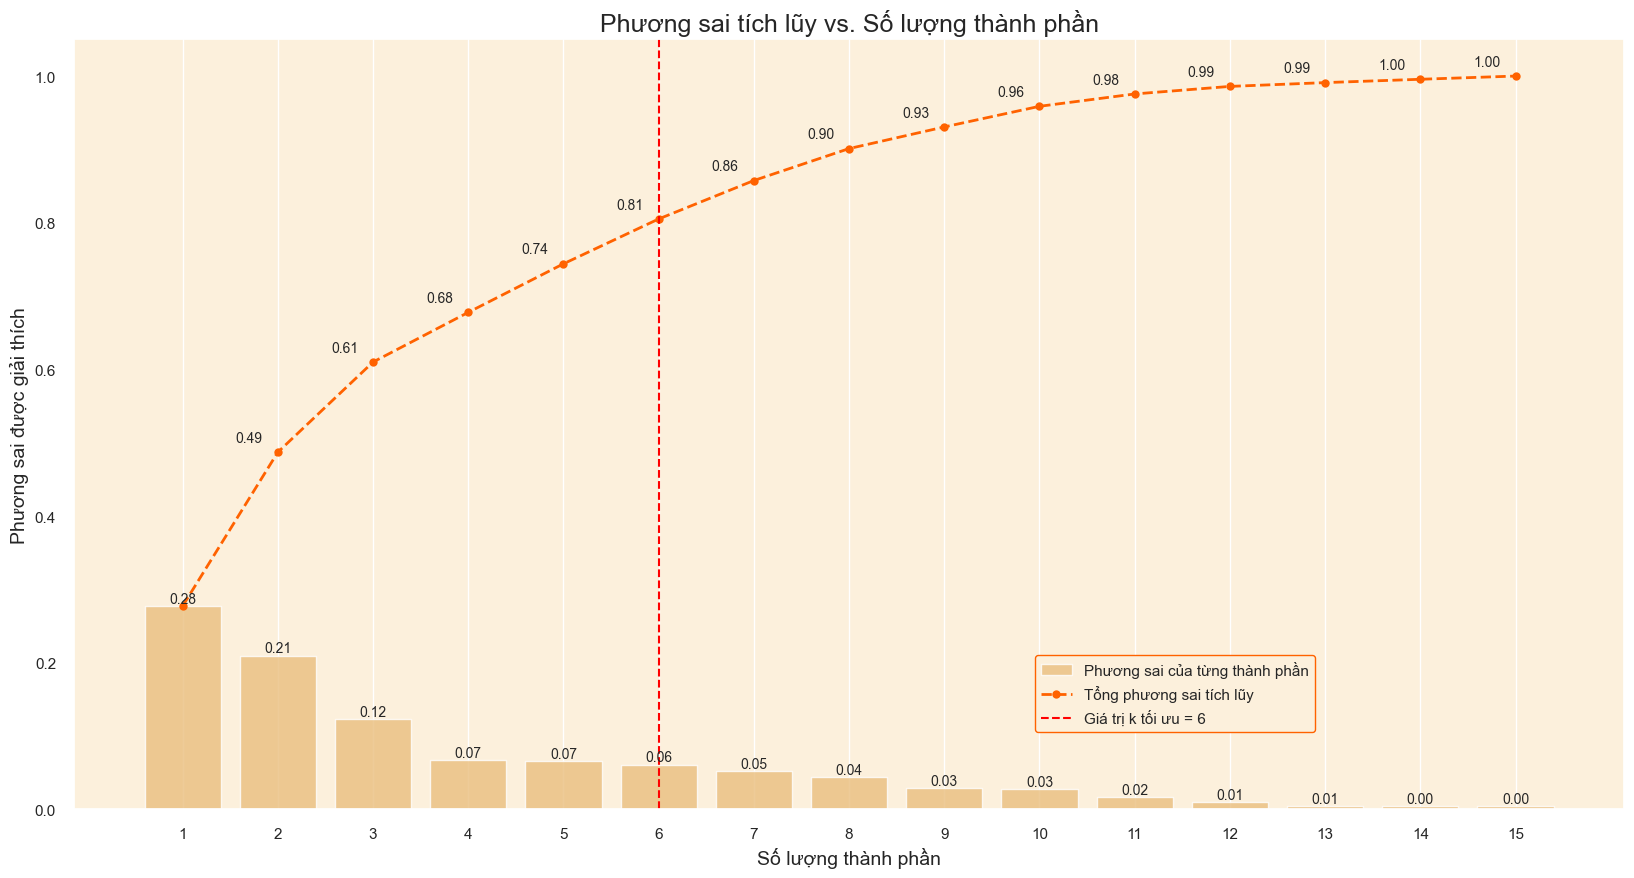

In [131]:
# Đặt cột CustomerID làm chỉ mục (index) cho DataFrame
customer_data_scaled.set_index('CustomerID', inplace=True)

# Áp dụng PCA
pca = PCA().fit(customer_data_scaled)

# Tính tổng tích lũy của phương sai được giải thích
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Thiết lập giá trị k tối ưu (dựa trên phân tích, ta chọn 6)
optimal_k = 6

# Thiết lập kiểu hiển thị biểu đồ seaborn
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

# Vẽ biểu đồ thể hiện tổng phương sai tích lũy theo số lượng thành phần
plt.figure(figsize=(20, 10))

# Biểu đồ cột cho phương sai được giải thích bởi từng thành phần
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#fcc36d',
                      alpha=0.8)

# Biểu đồ đường cho tổng phương sai tích lũy
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#ff6200', linewidth=2)

# Vẽ đường dọc thể hiện vị trí k tối ưu
optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}') 

# Thiết lập nhãn trục và tiêu đề
plt.xlabel('Số lượng thành phần', fontsize=14)
plt.ylabel('Phương sai được giải thích', fontsize=14)
plt.title('Phương sai tích lũy vs. Số lượng thành phần', fontsize=18)

# Tùy chỉnh các giá trị trục và chú thích
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Phương sai của từng thành phần', 'Tổng phương sai tích lũy', f'Giá trị k tối ưu = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,  
           edgecolor='#ff6200')  

# Hiển thị giá trị phương sai cụ thể trên cả hai biểu đồ
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()


Conclusion
The plot and the cumulative explained variance values indicate how much of the total variance in the dataset is captured by each principal component, as well as the cumulative variance explained by the first n components.

Here, we can observe that:

The first component explains approximately 28% of the variance.

The first two components together explain about 49% of the variance.

The first three components explain approximately 61% of the variance, and so on.

To choose the optimal number of components, we generally look for a point where adding another component doesn't significantly increase the cumulative explained variance, often referred to as the "elbow point" in the curve.

From the plot, we can see that the increase in cumulative variance starts to slow down after the 6th component (which captures about 81% of the total variance).

Considering the context of customer segmentation, we want to retain a sufficient amount of information to identify distinct customer groups effectively. Therefore, retaining the first 6 components might be a balanced choice, as they together explain a substantial portion of the total variance while reducing the dimensionality of the dataset.
*** Tiếng Việt ***
Kết luận
Biểu đồ và các giá trị phương sai tích lũy cho thấy mức độ phương sai tổng thể trong tập dữ liệu được giải thích bởi từng thành phần chính, cũng như phương sai tích lũy được giải thích bởi các thành phần đầu tiên.

Ở đây, ta có thể quan sát thấy rằng:

Thành phần đầu tiên giải thích khoảng 28% phương sai.

Hai thành phần đầu tiên kết hợp giải thích khoảng 49% phương sai.

Ba thành phần đầu tiên giải thích khoảng 61% phương sai, và cứ tiếp tục như vậy.

Để chọn số lượng thành phần tối ưu, chúng ta thường tìm một điểm mà việc thêm thành phần mới không làm tăng đáng kể phương sai tích lũy — điểm này thường được gọi là "elbow point" (điểm khuỷu) trên đường cong.

Từ biểu đồ, có thể thấy rằng sự gia tăng phương sai tích lũy bắt đầu chậm lại sau thành phần thứ 6 (thành phần này giúp tổng cộng đạt khoảng 81% phương sai của toàn bộ dữ liệu).

Xét trong bối cảnh phân khúc khách hàng, chúng ta cần giữ lại đủ thông tin để phân biệt rõ các nhóm khách hàng. Do đó, giữ lại 6 thành phần đầu tiên là một lựa chọn cân bằng — vừa giữ lại phần lớn phương sai quan trọng, vừa giúp giảm chiều cho dữ liệu đầu vào.

In [132]:
# Tạo đối tượng PCA với 6 thành phần
pca = PCA(n_components=6)

# Huấn luyện và biến đổi dữ liệu gốc sang không gian PCA mới
customer_data_pca = pca.fit_transform(customer_data_scaled)

# Tạo DataFrame mới từ dữ liệu PCA, với các cột được đặt tên là PC1, PC2, v.v.
customer_data_pca = pd.DataFrame(customer_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Thêm lại chỉ mục CustomerID vào DataFrame PCA mới
customer_data_pca.index = customer_data_scaled.index


In [133]:
customer_data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
CustomerID,,,,,,
12346.0,-2.186469,-1.705370,-1.576745,-1.008187,-0.411803,-1.658012
12347.0,3.290264,-1.387375,1.923310,0.930990,-0.010591,0.873150
12348.0,0.584684,0.585019,0.664727,0.655411,-0.470280,2.306657
12349.0,1.791116,-2.695652,5.850040,-0.853418,0.677111,-1.520098
12350.0,-1.997139,-0.542639,0.578781,-0.183682,-1.484838,0.062672


Now, let's extract the coefficients corresponding to each principal component to better understand the transformation performed by PCA:
*** Tiếng Việt ***
Bây giờ, hãy trích xuất các hệ số tương ứng với từng thành phần chính để hiểu rõ hơn về phép biến đổi mà PCA đã thực hiện.

In [134]:
!pip install jinja2


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\AORUS 15\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [135]:
# Define a function to highlight the top 3 absolute values in each column of a dataframe
def highlight_top3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color: #007acc; color: white' if i in top3 else '' for i in column.index]



# Create the PCA component DataFrame and apply the highlighting function
pc_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)],  
                     index=customer_data_scaled.columns)

pc_df.style.apply(highlight_top3, axis=0)

,PC1,PC2,PC3,PC4,PC5,PC6
Days_Since_Last_Purchase,-0.217859,-0.013986,0.067660,-0.273430,-0.240968,-0.373059
Total_Transactions,0.380301,0.014759,-0.259180,0.138165,-0.017356,-0.028257
Total_Products_Purchased,0.401425,0.007365,0.069133,0.134806,0.057476,-0.013373
Total_Spend,0.431260,0.010159,0.065165,0.092047,0.025202,-0.036947
Average_Transaction_Value,0.176225,-0.015544,0.589050,-0.114307,0.021847,-0.101738
Unique_Products_Purchased,0.324992,0.063346,0.014010,0.230502,-0.193981,0.124604
Average_Days_Between_Purchases,-0.022600,-0.036007,-0.127341,0.160627,0.753462,0.211787
Day_Of_Week,-0.026572,0.994650,-0.006591,-0.028870,0.058359,-0.060799
Hour,-0.024259,0.056388,-0.002019,0.226832,-0.528881,0.621915
Is_UK,-0.001014,0.007435,-0.018378,0.013419,-0.005353,0.014384


Step 9 | K-Means Clustering

K-Means:
K-Means is an unsupervised machine learning algorithm that clusters data into a specified number of groups (K) by minimizing the within-cluster sum-of-squares (WCSS), also known as inertia. The algorithm iteratively assigns each data point to the nearest centroid, then updates the centroids by calculating the mean of all assigned points. The process repeats until convergence or a stopping criterion is reached.
*** Tiếng Việt ***
K-Means là một thuật toán học máy không giám sát (unsupervised learning) dùng để phân cụm dữ liệu thành một số lượng nhóm xác định trước (K cụm), bằng cách tối thiểu hóa tổng bình phương khoảng cách trong cụm (gọi là WCSS – Within-Cluster Sum of Squares, hay còn gọi là inertia).
Thuật toán hoạt động theo quy trình lặp như sau:
Gán mỗi điểm dữ liệu vào tâm cụm gần nhất (centroid).
Cập nhật lại vị trí của các tâm cụm bằng cách tính trung bình các điểm thuộc cụm đó.
Lặp lại quá trình trên cho đến khi thuật toán hội tụ (centroids không thay đổi nữa) hoặc đạt điều kiện dừng.

Step 9.1 | Determining the Optimal Number of Clusters

To ascertain the optimal number of clusters (k) for segmenting customers, I will explore two renowned methods:

-Elbow Method

-Silhouette Method

It's common to utilize both methods in practice to corroborate the results.
*** Tiếng Việt ***
Để xác định số lượng cụm tối ưu (k) trong việc phân khúc khách hàng, tôi sẽ sử dụng hai phương pháp nổi tiếng sau:
Phương pháp Elbow (Elbow Method)

Phương pháp Silhouette (Silhouette Method)

Trong thực tế, người ta thường sử dụng cả hai phương pháp để xác thực chéo kết quả nhằm đưa ra quyết định chính xác hơn.

Step 9.1.1 | Elbow Method

What is the Elbow Method?
The Elbow Method is a technique for identifying the ideal number of clusters in a dataset. It involves iterating through the data, generating clusters for various values of k. The k-means algorithm calculates the sum of squared distances between each data point and its assigned cluster centroid, known as the inertia or WCSS score. By plotting the inertia score against the k value, we create a graph that typically exhibits an elbow shape, hence the name "Elbow Method". The elbow point represents the k-value where the reduction in inertia achieved by increasing k becomes negligible, indicating the optimal stopping point for the number of clusters.
*** Tiếng Việt ***
Elbow Method là gì?
Elbow Method (phương pháp khuỷu tay) là một kỹ thuật dùng để xác định số lượng cụm lý tưởng trong một tập dữ liệu. Phương pháp này thực hiện bằng cách:
Lặp qua nhiều giá trị khác nhau của k (số cụm)
Với mỗi k, thuật toán K-means sẽ tính tổng bình phương khoảng cách giữa từng điểm dữ liệu và tâm cụm được gán — gọi là inertia hoặc WCSS (Within-Cluster Sum of Squares)
Sau đó, ta vẽ biểu đồ giữa giá trị inertia và số cụm k. Đường cong thu được thường có hình dạng giống như khuỷu tay, vì thế gọi là "Elbow Method".
👉 Điểm khuỷu tay (elbow point) chính là giá trị k mà từ đó, việc tăng thêm cụm không giúp giảm đáng kể inertia nữa. Đây được xem là số cụm tối ưu cần chọn.

Utilizing the YellowBrick Library
In this section, I will employ the YellowBrick library to facilitate the implementation of the Elbow method. YellowBrick, an extension of the Scikit-Learn API, is renowned for its ability to rapidly generate insightful visualizations in the field of machine learning.
*** Tiếng Việt ***
Sử dụng thư viện YellowBrick
Trong phần này, tôi sẽ sử dụng thư viện YellowBrick để hỗ trợ triển khai phương pháp Elbow.
YellowBrick là một thư viện mở rộng của Scikit-Learn API, nổi tiếng nhờ khả năng tạo ra các trực quan hóa nhanh chóng và trực quan trong lĩnh vực học máy (machine learning).

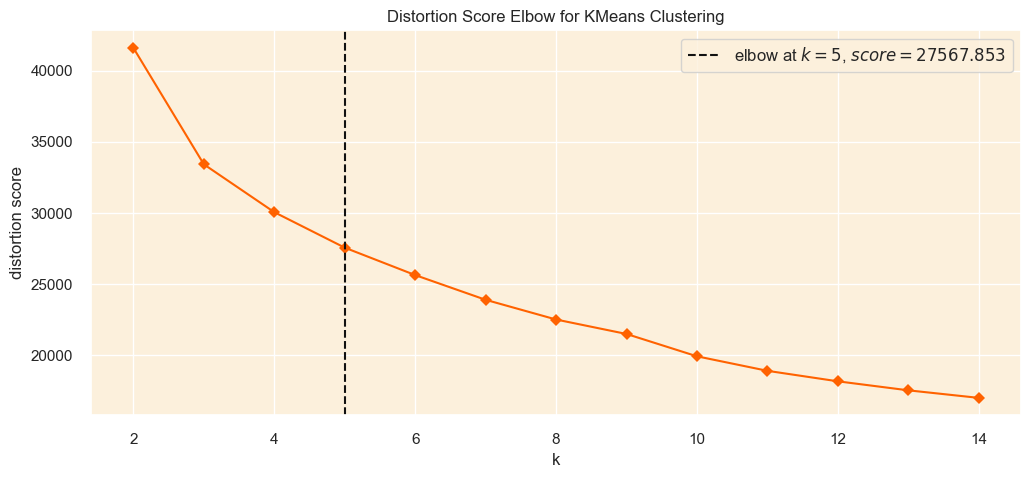

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [136]:
# Thiết lập kiểu biểu đồ và màu nền trục
sns.set(style='darkgrid', rc={'axes.facecolor': '#fcf0dc'})

# Thiết lập bảng màu cho biểu đồ
sns.set_palette(['#ff6200'])

# Khởi tạo mô hình phân cụm KMeans với các tham số được chỉ định
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

# Tạo đối tượng biểu đồ và trục với kích thước mong muốn
fig, ax = plt.subplots(figsize=(12, 5))

# Khởi tạo KElbowVisualizer với mô hình và phạm vi giá trị k, tắt hiển thị thời gian huấn luyện
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)

# Huấn luyện mô hình với dữ liệu đầu vào để vẽ biểu đồ Elbow
visualizer.fit(customer_data_pca)

# Hoàn tất và hiển thị biểu đồ
visualizer.show()

Optimal k Value: Elbow Method Insights
The optimal value of k for the KMeans clustering algorithm can be found at the elbow point. Using the YellowBrick library for the Elbow method, we observe that the suggested optimal k value is 5. However, we don't have a very distinct elbow point in this case, which is common in real-world data. From the plot, we can see that the inertia continues to decrease significantly up to k=5, indicating that the optimum value of k could be between 3 and 7. To choose the best k within this range, we can employ the silhouette analysis, another cluster quality evaluation method. Additionally, incorporating business insights can help determine a practical k value.
*** Tiếng Việt ***
Giá trị k tối ưu: Phân tích từ phương pháp Elbow
Giá trị k tối ưu cho thuật toán phân cụm KMeans có thể được xác định tại điểm khuỷu tay (elbow point).
Khi sử dụng thư viện YellowBrick để triển khai phương pháp Elbow, chúng ta nhận thấy rằng giá trị k được đề xuất là 5.

Tuy nhiên, trong trường hợp này điểm khuỷu tay không quá rõ ràng, điều này là khá phổ biến khi làm việc với dữ liệu thực tế.
Từ biểu đồ, ta thấy rằng độ lệch (inertia) tiếp tục giảm đáng kể cho đến k = 5, điều này cho thấy giá trị k tối ưu có thể nằm trong khoảng từ 3 đến 7.

Để chọn được giá trị k tốt nhất trong khoảng này, chúng ta có thể sử dụng thêm phân tích silhouette — một phương pháp đánh giá chất lượng cụm khác.
Ngoài ra, việc kết hợp với hiểu biết nghiệp vụ (business insights) cũng có thể giúp đưa ra lựa chọn k phù hợp và thực tiễn hơn.

Step 9.1.2 | Silhouette Method

Methodology
In the following analysis:

I will initially choose a range of 2-6 for the number of clusters (k) based on the Elbow method from the previous section. Next, I will plot Silhouette scores for each k value to determine the one with the highest score.
Subsequently, to fine-tune the selection of the most appropriate k, I will generate Silhouette plots that visually display the silhouette coefficients for each data point within various clusters.
The YellowBrick library will be utilized once again to create these plots and facilitate a comparative analysis.
*** Tiếng Việt ***
Trong phần phân tích tiếp theo:

Tôi sẽ bắt đầu với việc chọn k trong khoảng từ 2 đến 6, dựa trên kết quả từ phương pháp Elbow ở phần trước.

Sau đó, tôi sẽ vẽ biểu đồ điểm số Silhouette cho từng giá trị k để xác định giá trị nào có điểm số cao nhất.

Tiếp theo, để tinh chỉnh và xác định giá trị k phù hợp nhất, tôi sẽ tạo biểu đồ Silhouette chi tiết – hiển thị trực quan hệ số silhouette của từng điểm dữ liệu trong các cụm khác nhau.

Thư viện YellowBrick sẽ tiếp tục được sử dụng để tạo các biểu đồ này và hỗ trợ việc so sánh trực quan giữa các giá trị k.

In [137]:
def silhouette_analysis(df, start_k, stop_k, figsize=(15, 16)):
    """
    Thực hiện phân tích Silhouette cho một dải giá trị k và trực quan hóa kết quả.
    """

    # Thiết lập kích thước cho toàn bộ biểu đồ
    plt.figure(figsize=figsize)

    # Tạo lưới gồm (stop_k - start_k + 1) hàng và 2 cột
    grid = gridspec.GridSpec(stop_k - start_k + 1, 2)

    # Gán biểu đồ đầu tiên vào hàng đầu tiên, chiếm cả 2 cột
    first_plot = plt.subplot(grid[0, :])

    # Biểu đồ đầu tiên: Điểm Silhouette cho từng giá trị k
    sns.set_palette(['darkorange'])

    silhouette_scores = []

    # Lặp qua các giá trị k trong khoảng được chỉ định
    for k in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
        km.fit(df)
        labels = km.predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)

    # Xác định k có điểm silhouette cao nhất
    best_k = start_k + silhouette_scores.index(max(silhouette_scores))

    # Vẽ đường biểu diễn điểm silhouette theo k
    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o')
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Số lượng cụm (k)')
    plt.ylabel('Điểm Silhouette')
    plt.title('Điểm Silhouette trung bình theo từng giá trị k', fontsize=15)

    # Thêm chú thích về giá trị k tối ưu vào biểu đồ
    optimal_k_text = f'Giá trị k có điểm Silhouette cao nhất là: {best_k}'
    plt.text(10, 0.23, optimal_k_text, fontsize=12, verticalalignment='bottom', 
             horizontalalignment='left', bbox=dict(facecolor='#fcc36d', edgecolor='#ff6200', boxstyle='round, pad=0.5'))

    # Biểu đồ thứ hai: Biểu đồ Silhouette chi tiết cho từng giá trị k
    colors = sns.color_palette("bright")

    for i in range(start_k, stop_k + 1):    
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
        row_idx, col_idx = divmod(i - start_k, 2)

        # Gán biểu đồ vào đúng hàng và cột trong lưới
        ax = plt.subplot(grid[row_idx + 1, col_idx])

        visualizer = SilhouetteVisualizer(km, colors=colors, ax=ax)
        visualizer.fit(df)

        # Thêm chú thích điểm silhouette cho từng biểu đồ cụ thể
        score = silhouette_score(df, km.labels_)
        ax.text(0.97, 0.02, f'Điểm Silhouette: {score:.2f}', fontsize=12,
                ha='right', transform=ax.transAxes, color='red')

        ax.set_title(f'Biểu đồ Silhouette cho {i} cụm', fontsize=15)

    # Căn chỉnh bố cục và hiển thị toàn bộ biểu đồ
    plt.tight_layout()
    plt.show()


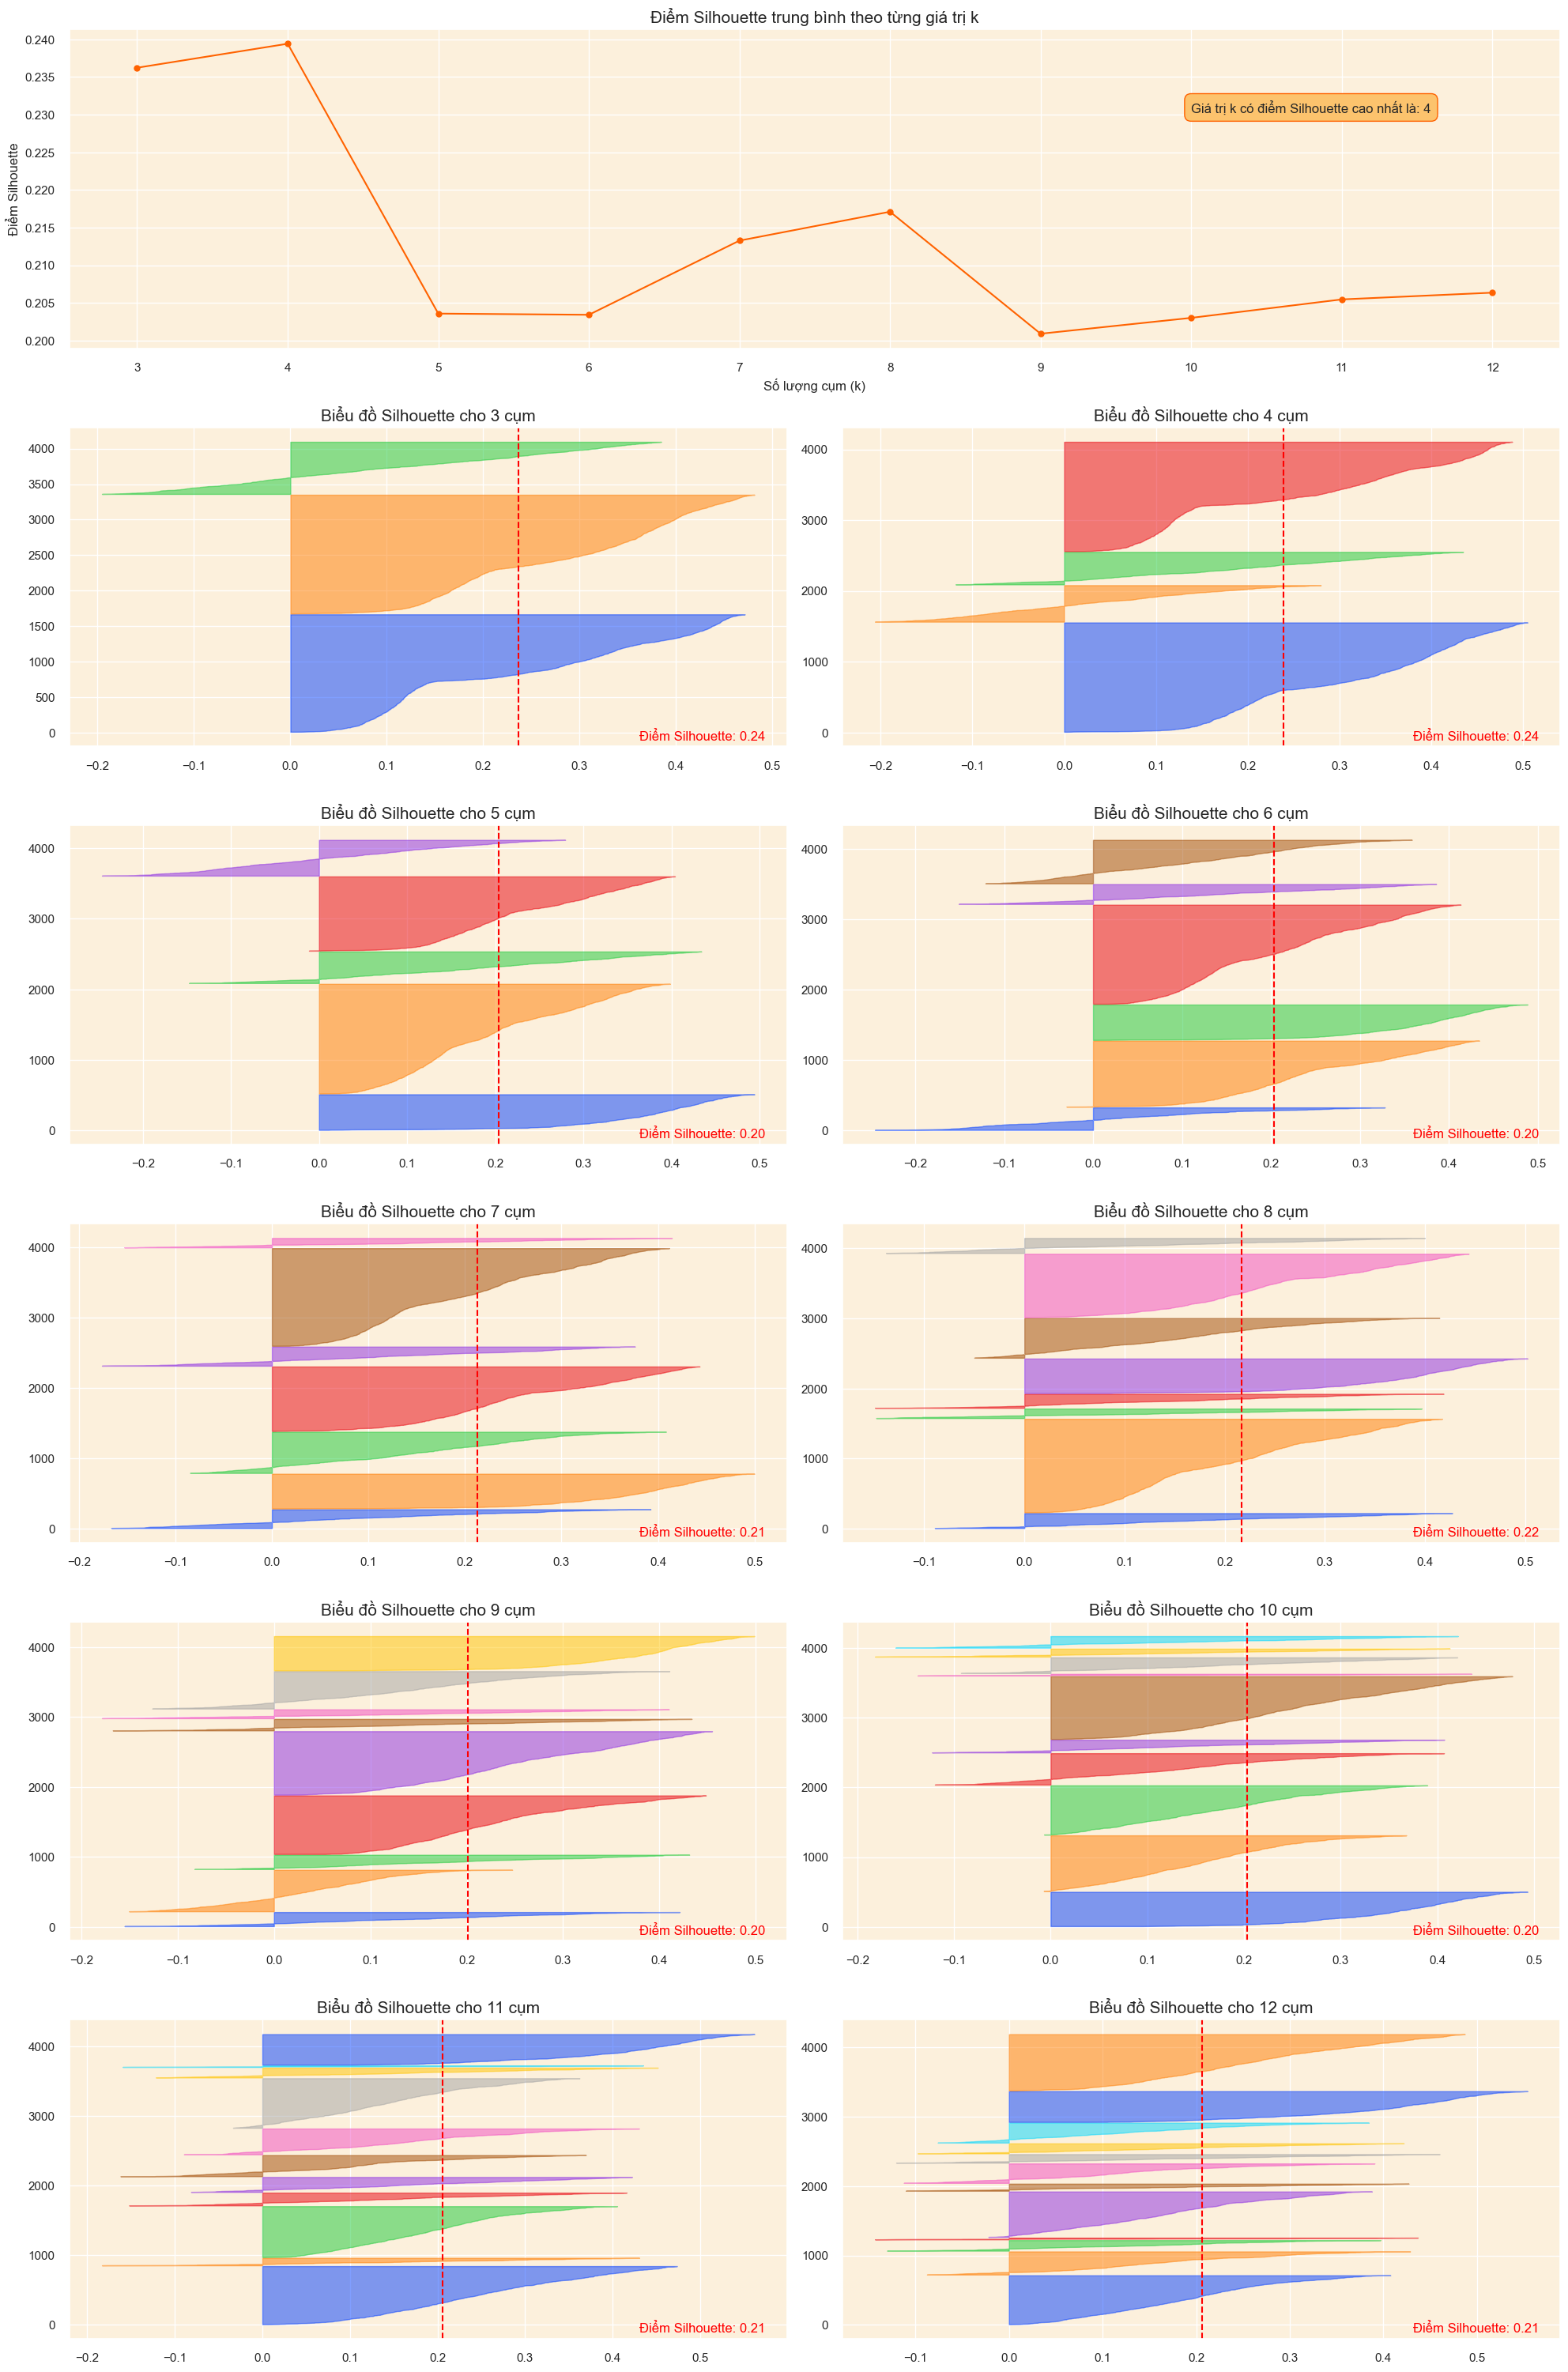

In [138]:
silhouette_analysis(customer_data_pca, 3, 12, figsize=(20, 50))

Guidelines to Interpret Silhouette Plots and Determine the Optimal K:
To interpret silhouette plots and identify the optimal number of clusters (( k )), consider the following criteria:

1️⃣ Analyze the Silhouette Plots:

Silhouette Score Width:

Wide Widths (closer to +1): Indicate that the data points in the cluster are well separated from points in other clusters, suggesting well-defined clusters.
Narrow Widths (closer to -1): Show that data points in the cluster are not distinctly separated from other clusters, indicating poorly defined clusters.
Average Silhouette Score:

High Average Width: A cluster with a high average silhouette score indicates well-separated clusters.
Low Average Width: A cluster with a low average silhouette score indicates poor separation between clusters.
2️⃣ Uniformity in Cluster Size:

2.1 Cluster Thickness:

Uniform Thickness: Indicates that clusters have a roughly equal number of data points, suggesting a balanced clustering structure.
Variable Thickness: Signifies an imbalance in the data point distribution across clusters, with some clusters having many data points and others too few.
3️⃣ Peaks in Average Silhouette Score:
Clear Peaks: A clear peak in the average silhouette score plot for a specific ( k ) value indicates this ( k ) might be optimal.
4️⃣ Minimize Fluctuations in Silhouette Plot Widths:
Uniform Widths: Seek silhouette plots with similar widths across clusters, suggesting a more balanced and optimal clustering.
Variable Widths: Avoid wide fluctuations in silhouette plot widths, indicating that clusters are not well-defined and may vary in compactness.
5️⃣ Optimal Cluster Selection:
Maximize the Overall Average Silhouette Score: Choose the ( k ) value that gives the highest average silhouette score across all clusters, indicating well-defined clusters.
Avoid Below-Average Silhouette Scores: Ensure most clusters have above-average silhouette scores to prevent suboptimal clustering structures.
6️⃣ Visual Inspection of Silhouette Plots:
Consistent Cluster Formation: Visually inspect the silhouette plots for each ( k ) value to evaluate the consistency and structure of the formed clusters.
Cluster Compactness: Look for more compact clusters, with data points having silhouette scores closer to +1, indicating better clustering.
Optimal k Value: Silhouette Method Insights
Based on above guidelines and after carefully considering the silhouette plots, it's clear that choosing ( k = 3 ) is the better option. This choice gives us clusters that are more evenly matched and well-defined, making our clustering solution stronger and more reliable.
*** Tiếng Việt ***
Hướng dẫn diễn giải biểu đồ Silhouette và xác định giá trị k tối ưu
Để diễn giải biểu đồ Silhouette và xác định số lượng cụm tối ưu (k), bạn cần xem xét các tiêu chí sau:

1️⃣ Phân tích biểu đồ Silhouette:
➤ Chiều rộng hệ số Silhouette (Silhouette Score Width):
Chiều rộng lớn (gần +1):
→ Các điểm dữ liệu trong cụm được phân tách rõ ràng khỏi các cụm khác → cụm chất lượng tốt.

Chiều rộng nhỏ (gần -1):
→ Các điểm bị lẫn với cụm khác → cụm không được xác định rõ → chất lượng kém.

➤ Điểm Silhouette trung bình (Average Silhouette Score):
Trung bình cao:
→ Các cụm được phân tách tốt, ổn định.

Trung bình thấp:
→ Cụm không tách biệt rõ, dữ liệu bị chồng lấn giữa các nhóm.

2️⃣ Độ đồng đều về kích thước cụm (Uniformity in Cluster Size):
2.1 Độ dày cụm (Cluster Thickness):
Độ dày đồng đều:
→ Mỗi cụm có số lượng điểm gần bằng nhau → phân cụm cân bằng.

Độ dày không đều:
→ Một số cụm có quá nhiều điểm, số khác quá ít → phân cụm mất cân bằng.

3️⃣ Đỉnh rõ ràng trong biểu đồ điểm Silhouette trung bình:
Nếu có đỉnh rõ ràng trong biểu đồ điểm Silhouette theo k
→ Giá trị k tương ứng với đỉnh đó có thể là tối ưu.

4️⃣ Giảm biến động trong độ rộng Silhouette:
Chiều rộng đồng đều:
→ Các cụm có chất lượng tương đương → phân cụm ổn định, đáng tin cậy.

Chiều rộng biến động mạnh:
→ Một số cụm tốt, số khác kém → cần xem xét lại cấu trúc cụm.

5️⃣ Chọn cụm tối ưu (Optimal Cluster Selection):
Tối đa hóa điểm Silhouette trung bình tổng thể:
→ Chọn giá trị k cho điểm số cao nhất → cụm rõ ràng và tách biệt.

Tránh các cụm có điểm dưới mức trung bình:
→ Không nên chọn cấu trúc cụm mà trong đó phần lớn cụm có điểm thấp.

6️⃣ Kiểm tra trực quan biểu đồ Silhouette:
Sự hình thành cụm đồng đều:
→ Các cụm có cấu trúc nhất quán, ổn định về kích thước và phân bố.

Cụm chặt chẽ:
→ Các điểm có điểm silhouette gần +1 → cụm được xác định tốt.

✅ Kết luận – Kết quả từ phương pháp Silhouette
Dựa vào các nguyên tắc trên và sau khi xem xét kỹ các biểu đồ Silhouette, có thể kết luận rằng:

👉 Chọn k = 3 là lựa chọn tốt hơn.

Vì:

Các cụm được tạo ra cân bằng hơn

Cấu trúc cụm rõ ràng, ít bị lẫn, Silhouette Score cao

→ Giải pháp phân cụm từ đó sẽ ổn định, đáng tin cậy và có ý nghĩa hơn.


Step 9.2 | Clustering Model - K-means

In this step, I am going to apply the K-means clustering algorithm to segment customers into different clusters based on their purchasing behaviors and other characteristics, using the optimal number of clusters determined in the previous step.

It's important to note that the K-means algorithm might assign different labels to the clusters in each run. To address this, we have taken an additional step to swap the labels based on the frequency of samples in each cluster, ensuring a consistent label assignment across different runs.
*** Tiếng Việt ***
Trong bước này, tôi sẽ áp dụng thuật toán phân cụm K-means để phân khúc khách hàng thành các nhóm khác nhau, dựa trên hành vi mua hàng và các đặc điểm liên quan khác, sử dụng số lượng cụm tối ưu đã được xác định ở bước trước.
Điều quan trọng cần lưu ý là thuật toán K-means có thể gán nhãn cụm khác nhau trong mỗi lần chạy, do tính chất khởi tạo ngẫu nhiên ban đầu.
👉 Để giải quyết vấn đề này, tôi đã thực hiện một bước bổ sung là sắp xếp lại nhãn cụm theo tần suất xuất hiện (số lượng điểm trong mỗi cụm), nhằm đảm bảo rằng việc gán nhãn cụm là nhất quán giữa các lần chạy khác nhau.

In [139]:
# Áp dụng thuật toán phân cụm KMeans với số cụm tối ưu đã xác định (k = 3)
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(customer_data_pca)

# Lấy tần suất xuất hiện của từng cụm
cluster_frequencies = Counter(kmeans.labels_)

# Tạo ánh xạ từ nhãn cũ sang nhãn mới dựa trên tần suất (cụm đông nhất sẽ là cụm 0, tiếp theo là 1, rồi 2)
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

# Đảo lại ánh xạ theo thứ tự mong muốn (tuỳ chỉnh theo tiêu chí phân tích của bạn)
label_mapping = {v: k for k, v in {2: 1, 1: 0, 0: 2}.items()}

# Áp dụng ánh xạ để tạo nhãn cụm mới cho từng khách hàng
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Thêm cột nhãn cụm mới vào dataset gốc đã được làm sạch
customer_data_cleaned['cluster'] = new_labels

# Thêm cột nhãn cụm mới vào dataset PCA (dữ liệu đã được giảm chiều)
customer_data_pca['cluster'] = new_labels


In [140]:
customer_data_cleaned.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,cluster
0,12346.0,325,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0,2
1,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789,4.486071,0
2,12348.0,75,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,0.0,359.31,203.875689,-100.884,1
3,12349.0,18,1,630,1457.55,1457.55,72,0.0,0,9,0,0,0.0,1457.55,0.0,0.0,2
4,12350.0,310,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0,0.0,2


Step 10 | Clustering Evaluation

After determining the optimal number of clusters (which is 3 in our case) using elbow and silhouette analyses, I move onto the evaluation step to assess the quality of the clusters formed. This step is essential to validate the effectiveness of the clustering and to ensure that the clusters are coherent and well-separated. The evaluation metrics and a visualization technique I plan to use are outlined below:

1️⃣ 3D Visualization of Top PCs
2️⃣ Cluster Distribution Visualization
3️⃣ Evaluation Metrics

Silhouette Score
Calinski Harabasz Score
Davies Bouldin Score
Note: We are using the PCA version of the dataset for evaluation because this is the space where the clusters were actually formed, capturing the most significant patterns in the data. Evaluating in this space ensures a more accurate representation of the cluster quality, helping us understand the true cohesion and separation achieved during clustering. This approach also aids in creating a clearer 3D visualization using the top principal components, illustrating the actual separation between clusters.
*** Tiếng Việt ***
Sau khi xác định được số lượng cụm tối ưu (trong trường hợp này là 3) bằng các phương pháp elbow và silhouette, tôi chuyển sang bước đánh giá cụm nhằm kiểm tra chất lượng của các cụm đã hình thành.
Bước đánh giá này rất quan trọng để:
Xác nhận tính hiệu quả của quá trình phân cụm
Đảm bảo rằng các cụm được tạo ra là rõ ràng, chặt chẽ và tách biệt
🔍 Các tiêu chí và phương pháp trực quan hóa tôi sẽ sử dụng gồm:
1️⃣ Trực quan hóa 3D theo 3 thành phần chính (top PCs)
→ Giúp thấy rõ cụm tách biệt như thế nào trong không gian đã giảm chiều (PCA)
2️⃣ Biểu đồ phân bố cụm (Cluster Distribution)
→ Cho biết số lượng điểm trong từng cụm để đánh giá tính cân bằng
3️⃣ Các chỉ số đánh giá cụm (Evaluation Metrics):
Silhouette Score – đo mức độ "gắn bó" giữa điểm với cụm của chính nó
Calinski-Harabasz Score – càng cao càng tốt, thể hiện độ tách giữa các cụm
Davies-Bouldin Score – càng thấp càng tốt, đo độ chồng lấn giữa các cụm
🔎 Lưu ý:
Tôi sẽ sử dụng bộ dữ liệu đã được PCA để đánh giá, vì:
Đây chính là không gian mà các cụm đã được hình thành
PCA giữ lại những chiều mang thông tin quan trọng nhất
Đánh giá trong không gian này sẽ phản ánh chính xác hơn độ "rõ ràng" và "gắn kết" của từng cụm
Đồng thời, PCA giúp trực quan hóa dễ dàng hơn trên đồ thị 3D, thể hiện rõ sự phân tách cụm

Step 10.1 | 3D Visualization of Top Principal Components

In this part, I am going to choose the top 3 PCs (which capture the most variance in the data) and use them to create a 3D visualization. This will allow us to visually inspect the quality of separation and cohesion of clusters to some extent:
*** Tiếng Việt ***
Trong phần này, tôi sẽ chọn 3 thành phần chính (PCs) hàng đầu — là những thành phần giữ lại nhiều phương sai nhất trong dữ liệu — và sử dụng chúng để tạo một biểu đồ trực quan 3D.
Mục tiêu là:
Quan sát trực quan chất lượng của các cụm đã phân chia, bao gồm:
Mức độ tách biệt giữa các cụm
Mức độ gắn kết nội cụm
→ Dù không hoàn toàn định lượng, nhưng đây là cách hữu ích để đánh giá sơ bộ độ hiệu quả của việc phân cụm.

In [141]:
# Setting up the color scheme for the clusters (RGB order)
colors = ['#e8000b', '#1ac938', '#023eff']

In [142]:
pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\AORUS 15\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [143]:
# Tạo các DataFrame riêng biệt cho từng cụm
cluster_0 = customer_data_pca[customer_data_pca['cluster'] == 0] 
cluster_1 = customer_data_pca[customer_data_pca['cluster'] == 1] 
cluster_2 = customer_data_pca[customer_data_pca['cluster'] == 2] 

# Tạo biểu đồ phân tán 3D (3D scatter plot)
fig = go.Figure()

# Thêm dữ liệu của từng cụm vào biểu đồ và chỉ định màu sắc riêng
fig.add_trace(go.Scatter3d(x=cluster_0['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'], 
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Cụm 0'))
fig.add_trace(go.Scatter3d(x=cluster_1['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'], 
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Cụm 1'))
fig.add_trace(go.Scatter3d(x=cluster_2['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'], 
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Cụm 2'))

# Thiết lập tiêu đề và cấu hình giao diện biểu đồ
fig.update_layout(
    title=dict(text='Biểu đồ 3D thể hiện phân cụm khách hàng trong không gian PCA', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)

# Hiển thị biểu đồ
fig.show()


Step 10.2 | Cluster Distribution Visualization

I am going to utilize a bar plot to visualize the percentage of customers in each cluster, which helps in understanding if the clusters are balanced and significant:  
*** Tiếng Việt ***
Tôi sẽ sử dụng biểu đồ cột (bar plot) để trực quan hóa tỷ lệ phần trăm khách hàng trong từng cụm, nhằm giúp đánh giá xem các cụm có được phân bố cân bằng và có ý nghĩa hay không.

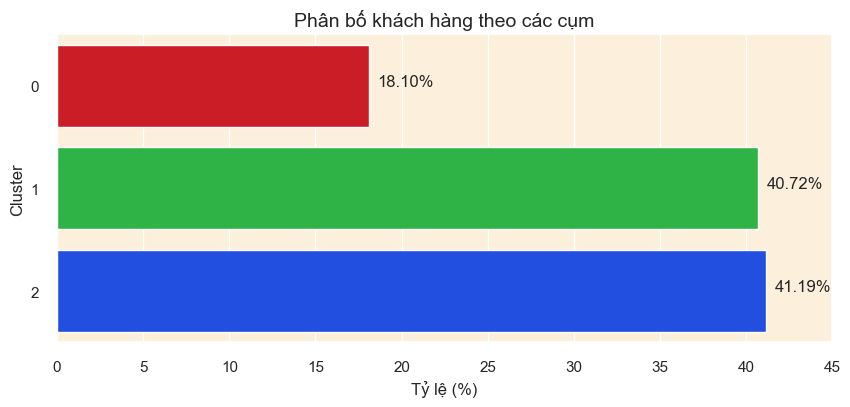

In [144]:
# Tính phần trăm khách hàng trong từng cụm
cluster_percentage = (customer_data_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Tạo biểu đồ cột ngang
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

# Thêm nhãn phần trăm trên từng thanh
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

# Đặt tiêu đề biểu đồ
plt.title('Phân bố khách hàng theo các cụm', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Tỷ lệ (%)')

# Hiển thị biểu đồ
plt.show()


Inference (Based on Actual Cluster Distribution)
The distribution of customers across the clusters, as shown in the bar chart, reveals a relatively balanced segmentation, with Cluster 1 and Cluster 2 each representing approximately 41% of the total customer base, while Cluster 0 accounts for about 18%—the smallest segment.

This distribution suggests that the clustering algorithm has successfully identified meaningful behavioral patterns in the data, rather than merely grouping outliers or noise. Each cluster represents a distinct and valuable customer segment, providing actionable insights for targeted business strategies, such as personalized marketing, loyalty programs, or customer service prioritization.

Although Cluster 0 comprises a smaller portion of the customer base, its size (nearly one-fifth of the total) still reflects a statistically significant and potentially strategic group. The reasonable proportion across all clusters ensures statistical relevance and supports reliable, data-driven decision-making.
*** Tiếng Việt ***
Sự phân bố khách hàng giữa các cụm, như được minh họa qua biểu đồ cột, cho thấy một phân bố tương đối đồng đều giữa hai cụm lớn (cụm 1 và cụm 2), với mỗi cụm chiếm khoảng 41% tổng số khách hàng. Trong khi đó, cụm 0 chiếm khoảng 18%, là nhóm khách hàng nhỏ nhất.

Phân bố này cho thấy quá trình phân cụm của chúng ta đã hoạt động hiệu quả trong việc nhận diện các nhóm hành vi tiêu dùng có ý nghĩa, thay vì chỉ gom nhóm nhiễu hoặc các giá trị ngoại lệ. Mỗi cụm phản ánh một phân khúc khách hàng riêng biệt, từ đó mang lại những gợi ý thiết thực cho các chiến lược kinh doanh, tiếp thị hoặc chăm sóc khách hàng sau này.

Mặc dù cụm 0 có tỷ lệ nhỏ hơn, nhưng với gần 1/5 tổng số khách hàng, nó vẫn là một nhóm đáng quan tâm chứ không phải là cụm nhiễu. Việc các cụm đều có tỷ trọng hợp lý giúp đảm bảo độ tin cậy trong phân tích và hỗ trợ doanh nghiệp đưa ra quyết định dựa trên dữ liệu chính xác.

Step 10.3 | Evaluation Metrics

To further scrutinize the quality of our clustering, I will employ the following metrics:

Silhouette Score: A measure to evaluate the separation distance between the clusters. Higher values indicate better cluster separation. It ranges from -1 to 1.
Calinski Harabasz Score: This score is used to evaluate the dispersion between and within clusters. A higher score indicates better defined clusters.
Davies Bouldin Score: It assesses the average similarity between each cluster and its most similar cluster. Lower values indicate better cluster separation.
*** Tiếng Việt ***
🔹 Silhouette Score:
Chỉ số này đo lường khoảng cách tách biệt giữa các cụm.
Giá trị càng cao (gần 1) càng cho thấy các cụm được phân tách rõ ràng và hợp lý.
Nó dao động từ -1 đến 1.

🔹 Calinski Harabasz Score:
Chỉ số này đánh giá sự phân tán giữa các cụm so với sự phân tán trong nội bộ từng cụm.
Giá trị càng cao càng cho thấy các cụm được xác định rõ và tách biệt tốt.

🔹 Davies Bouldin Score:
Chỉ số này đo độ tương đồng trung bình giữa mỗi cụm và cụm giống nó nhất.
Giá trị càng thấp càng chứng tỏ các cụm được phân chia tốt và không bị chồng lấn.

In [145]:
# Tính tổng số khách hàng (số quan sát)
num_observations = len(customer_data_pca)

# Tách phần đặc trưng đầu vào (features) và nhãn cụm đã phân
X = customer_data_pca.drop('cluster', axis=1)
clusters = customer_data_pca['cluster']

# Tính các chỉ số đánh giá chất lượng phân cụm
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Tạo bảng hiển thị các chỉ số cùng với số lượng quan sát
table_data = [
    ["Số lượng quan sát", num_observations],
    ["Chỉ số Silhouette", sil_score],
    ["Chỉ số Calinski Harabasz", calinski_score],
    ["Chỉ số Davies Bouldin", davies_score]
]

# In bảng ra màn hình
print(tabulate(table_data, headers=["Chỉ số", "Giá trị"], tablefmt='pretty'))


+--------------------------+---------------------+
|          Chỉ số          |       Giá trị       |
+--------------------------+---------------------+
|    Số lượng quan sát     |        4067         |
|    Chỉ số Silhouette     | 0.23622848017098869 |
| Chỉ số Calinski Harabasz | 1257.1747766540625  |
|  Chỉ số Davies Bouldin   |  1.368269537607467  |
+--------------------------+---------------------+


Đánh giá Chất lượng Phân cụm
Chỉ số Silhouette đạt khoảng 0.236, tuy không gần 1 nhưng vẫn cho thấy mức độ tách biệt tương đối giữa các cụm. Điều này gợi ý rằng các cụm có sự khác biệt nhất định, dù vẫn có thể có một số điểm dữ liệu nằm gần ranh giới giữa các cụm. Trong thực tế, chỉ số gần 1 sẽ thể hiện sự phân tách rõ ràng hơn giữa các cụm.

Chỉ số Calinski Harabasz là 1257.17, được xem là tương đối cao. Chỉ số này càng lớn thì càng cho thấy các cụm được phân chia rõ ràng hơn. Do đó, chỉ số này phản ánh rằng mô hình phân cụm đã xác định được cấu trúc đáng kể trong dữ liệu.

Chỉ số Davies Bouldin ở mức 1.37, là một giá trị chấp nhận được. Chỉ số này càng thấp thì càng tốt vì nó biểu thị rằng mức độ tương đồng giữa các cụm là thấp. Với giá trị hiện tại, mô hình vẫn thể hiện sự tách biệt tương đối ổn định giữa các cụm.

Step 11 | Cluster Analysis and Profiling

In this section, I am going to analyze the characteristics of each cluster to understand the distinct behaviors and preferences of different customer segments and also profile each cluster to identify the key traits that define the customers in each cluster.
*** Tiếng Việt ***
Trong phần này, tôi sẽ phân tích các đặc điểm của từng cụm để hiểu rõ hành vi và sở thích khác biệt của các nhóm khách hàng. Đồng thời, tôi cũng sẽ xây dựng hồ sơ cho từng cụm nhằm xác định các đặc điểm chính nổi bật của khách hàng trong mỗi nhóm.

Step 11.1 | Radar Chart Approach

First of all, I am going to create radar charts to visualize the centroid values of each cluster across different features. This can give a quick visual comparison of the profiles of different clusters.To construct the radar charts, it's essential to first compute the centroid for each cluster. This centroid represents the mean value for all features within a specific cluster. Subsequently, I will display these centroids on the radar charts, facilitating a clear visualization of the central tendencies of each feature across the various clusters:
*** Tiếng Việt ***
Trước tiên, tôi sẽ tạo các biểu đồ radar để trực quan hóa giá trị tâm (centroid) của từng cụm trên các đặc trưng khác nhau. Việc này giúp so sánh nhanh chóng hồ sơ của các cụm khác nhau.
Để xây dựng biểu đồ radar, trước hết cần tính toán giá trị tâm cho từng cụm. Tâm cụm này đại diện cho giá trị trung bình của tất cả các đặc trưng trong một cụm cụ thể. Sau đó, tôi sẽ hiển thị các giá trị tâm này trên biểu đồ radar, giúp dễ dàng quan sát xu hướng trung tâm của từng đặc trưng trên các cụm khách hàng khác nhau.

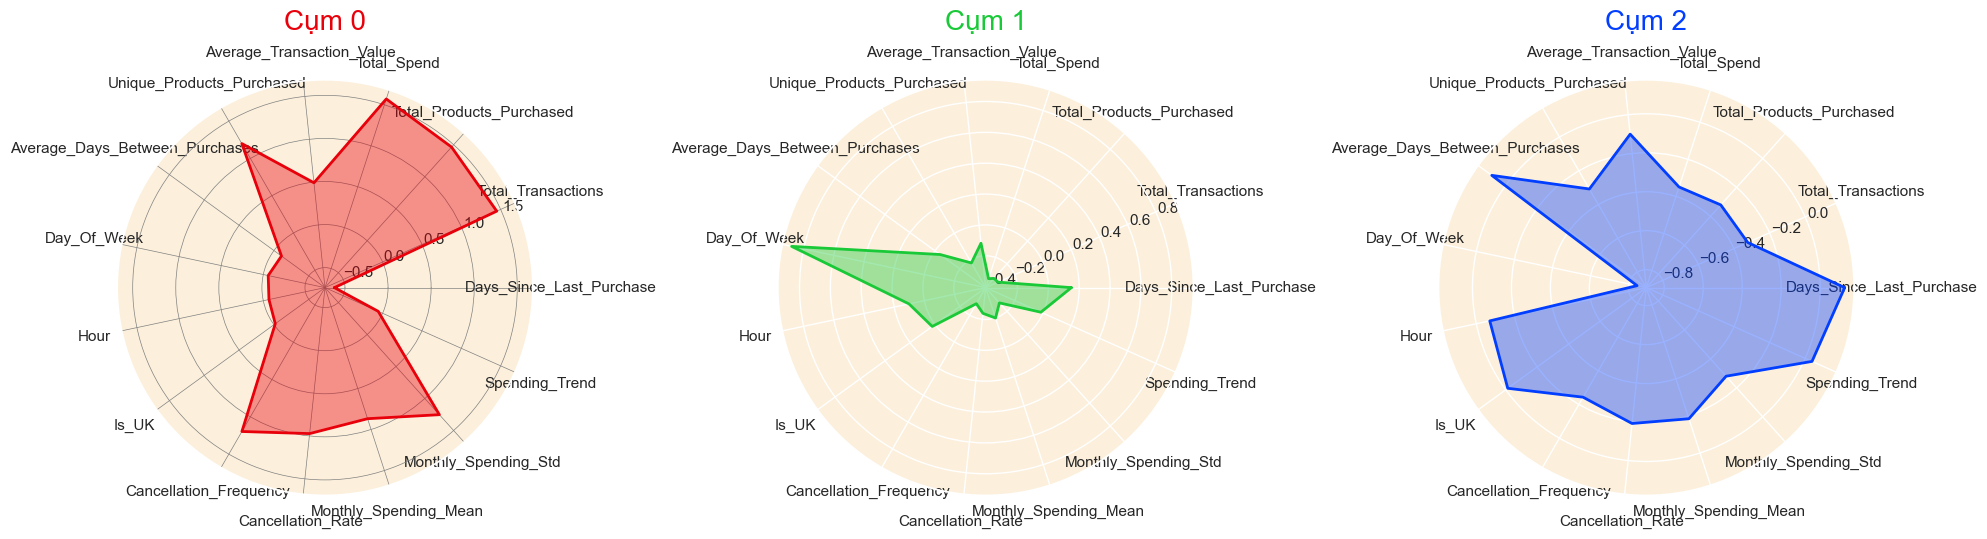

In [146]:
# Đặt cột 'CustomerID' làm chỉ số và gán vào một DataFrame mới
df_customer = customer_data_cleaned.set_index('CustomerID')

# Chuẩn hóa dữ liệu (loại bỏ cột 'cluster')
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_customer.drop(columns=['cluster'], axis=1))

# Tạo một DataFrame mới chứa các giá trị đã được chuẩn hóa và thêm lại cột 'cluster'
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_customer.columns[:-1], index=df_customer.index)
df_customer_standardized['cluster'] = df_customer['cluster']

# Tính tâm (centroid) của mỗi cụm bằng cách lấy giá trị trung bình của các đặc trưng
cluster_centroids = df_customer_standardized.groupby('cluster').mean()

# Hàm tạo biểu đồ radar
def create_radar_chart(ax, angles, data, color, cluster):
    # Vẽ biểu đồ và tô màu vùng bên trong
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    
    # Thêm tiêu đề cho biểu đồ
    ax.set_title(f'Cụm {cluster}', size=20, color=color, y=1.1)

# Đặt dữ liệu cho trục
labels = np.array(cluster_centroids.columns)
num_vars = len(labels)

# Tính góc cho từng trục (biểu đồ tròn)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Đóng vòng biểu đồ bằng cách lặp lại phần tử đầu tiên ở cuối danh sách
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Khởi tạo biểu đồ với 3 biểu đồ con (1 hàng, 3 cột)
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=3)

# Vẽ biểu đồ radar cho từng cụm
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Hoàn tất vòng lặp
    create_radar_chart(ax[i], angles, data, color, i)

# Thêm nhãn trục cho từng biểu đồ
ax[0].set_xticks(angles[:-1])
ax[0].set_xticklabels(labels[:-1])

ax[1].set_xticks(angles[:-1])
ax[1].set_xticklabels(labels[:-1])

ax[2].set_xticks(angles[:-1])
ax[2].set_xticklabels(labels[:-1])

# Thêm lưới vào biểu đồ
ax[0].grid(color='grey', linewidth=0.5)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


Customer Profiles Derived from Radar Chart Analysis
Cụm 0 (Biểu đồ Đỏ)
🎯 Hồ sơ: Khách hàng mua sắm thường xuyên và chi tiêu cao

Đây là nhóm có tần suất mua sắm cao nhất, thể hiện qua các giá trị rất lớn ở các chỉ số Total_Transactions, Total_Products_Purchased và Total_Spend.

Chỉ số Unique_Products_Purchased cũng cao, cho thấy họ mua đa dạng mặt hàng.

Họ cũng có giá trị trung bình mỗi giao dịch thấp, cho thấy họ mua thường xuyên nhưng chia nhỏ đơn hàng.

Spending_Trend cao, chứng tỏ mức chi tiêu đang có xu hướng tăng.

Dù chi tiêu cao, họ có tỷ lệ hủy đơn khá thấp (Cancellation_Rate và Cancellation_Frequency đều thấp).

Nhóm này có xu hướng không phải là người Anh (Is_UK thấp) và thường mua vào các ngày trong tuần (Day_Of_Week thấp).

Cụm 1 (Biểu đồ Xanh Lá)
🎯 Hồ sơ: Khách hàng rất ít mua và chi tiêu thấp

Đây là nhóm có mức độ hoạt động thấp nhất: các chỉ số Total_Transactions, Total_Products_Purchased, Total_Spend, và Average_Transaction_Value đều gần 0 hoặc âm.

Day_Of_Week rất cao, cho thấy họ có xu hướng mua vào cuối tuần.

Spending_Trend và Monthly_Spending đều thấp, chỉ ra rằng chi tiêu của họ ít và không ổn định.

Giá trị Cancellation_Rate và Cancellation_Frequency gần 0, cho thấy họ không hủy đơn hàng.

Tóm lại, đây là nhóm khách hàng ít hoạt động, chi tiêu thấp, không thường xuyên mua sắm.

Cụm 2 (Biểu đồ Xanh Dương)
🎯 Hồ sơ: Khách hàng ít giao dịch nhưng mỗi lần mua là lớn

Dù Total_Transactions và Total_Products_Purchased không cao, nhưng nhóm này có giá trị Average_Transaction_Value và Spending_Trend rất cao, cho thấy mỗi lần mua là đáng kể.

Days_Since_Last_Purchase và Average_Days_Between_Purchases cao, có nghĩa là họ không mua thường xuyên.

Is_UK và Hour cao, cho thấy họ chủ yếu là người Anh và mua sắm vào cuối ngày.

Nhóm này có mức chi tiêu lớn nhưng mức hủy đơn trung bình, không quá cao.

Họ có mức độ ổn định trong chi tiêu (Monthly_Spending_Std vừa phải).

Step 11.2 | Histogram Chart Approach

To validate the profiles identified from the radar charts, we can plot histograms for each feature segmented by the cluster labels. These histograms will allow us to visually inspect the distribution of feature values within each cluster, thereby confirming or refining the profiles we have created based on the radar charts.
*** Tiếng Việt ***
Để xác thực các hồ sơ khách hàng đã được xác định từ biểu đồ radar, chúng ta có thể vẽ các biểu đồ histogram cho từng đặc trưng (feature), được phân chia theo nhãn cụm (cluster labels). Những biểu đồ này sẽ giúp chúng ta quan sát trực quan sự phân bố giá trị của các đặc trưng trong từng cụm, từ đó xác nhận hoặc điều chỉnh lại các hồ sơ khách hàng đã xây dựng dựa trên biểu đồ radar.

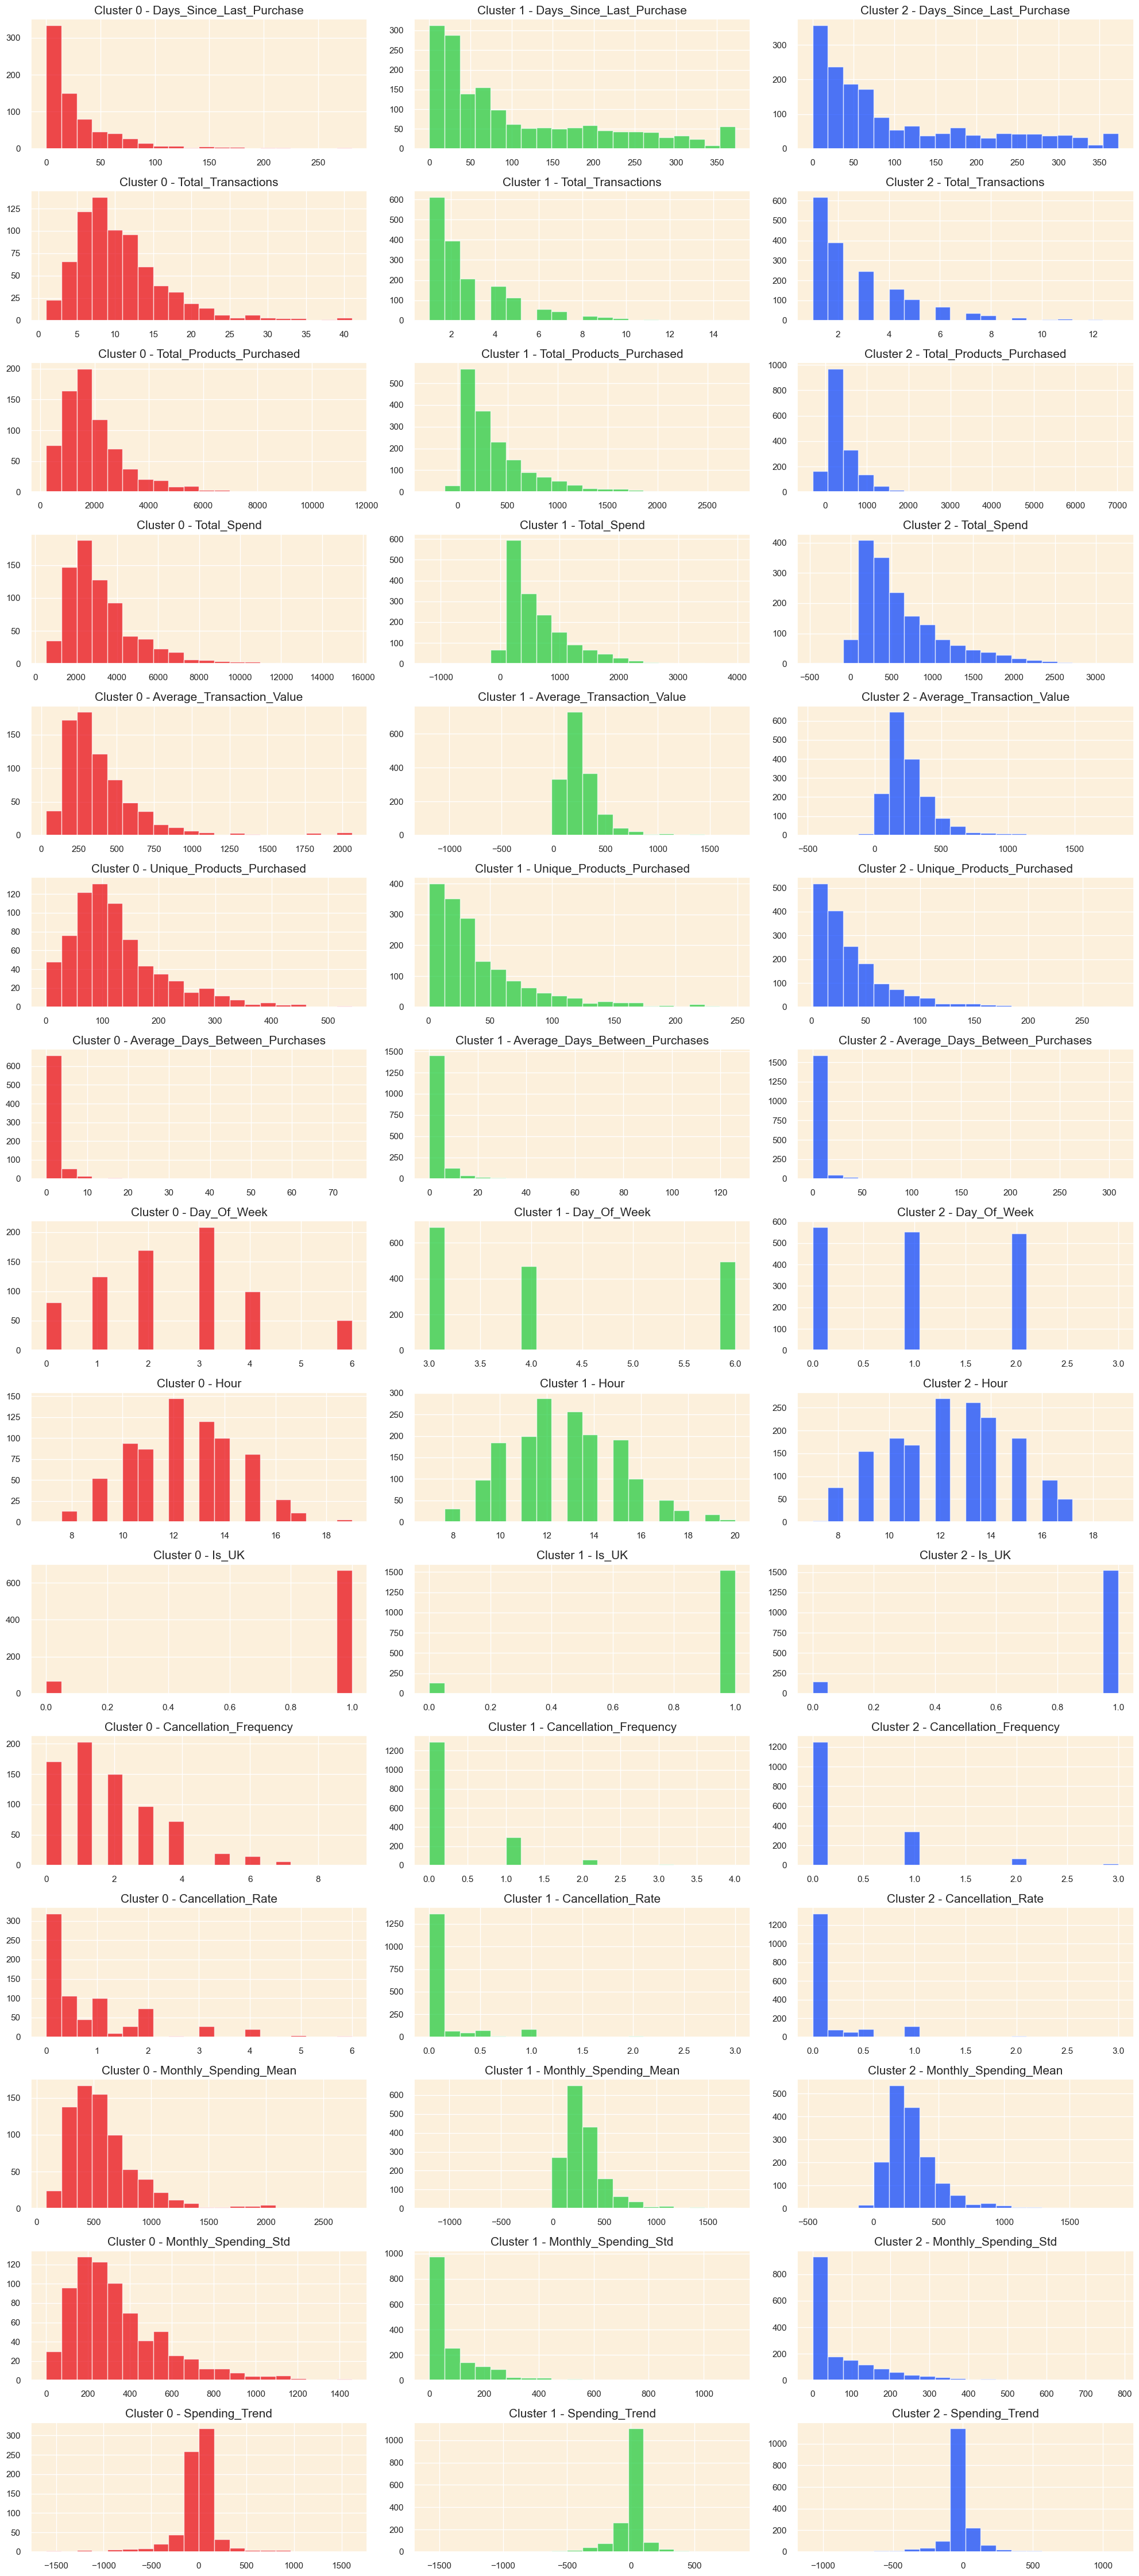

In [147]:
# Vẽ các biểu đồ histogram cho từng đặc trưng, phân theo các cụm
features = customer_data_cleaned.columns[1:-1]  # Lấy danh sách các đặc trưng (bỏ cột CustomerID và cluster)
clusters = customer_data_cleaned['cluster'].unique()  # Lấy danh sách các cụm
clusters.sort()  # Sắp xếp thứ tự cụm

# Thiết lập hệ thống các ô (subplot)
n_rows = len(features)  # Số hàng bằng số đặc trưng
n_cols = len(clusters)  # Số cột bằng số cụm
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))  # Khởi tạo biểu đồ

# Vẽ histogram cho từng đặc trưng và từng cụm
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster][feature]  # Dữ liệu của cụm
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)  # Vẽ biểu đồ
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)  # Tiêu đề
        axes[i, j].set_xlabel('')  # Không đặt nhãn trục x
        axes[i, j].set_ylabel('')  # Không đặt nhãn trục y

# Điều chỉnh bố cục để tránh chồng chéo
plt.tight_layout()
plt.show()


The detailed insights from the histograms provide a more nuanced understanding of each cluster, helping in refining the profiles to represent the customer behaviors more accurately. Based on the detailed analysis from both the radar charts and the histograms, here are the refined profiles and titles for each cluster:
*** Tiếng Việt ***
Những hiểu biết chi tiết từ các biểu đồ histogram cung cấp một cái nhìn sâu sắc hơn về từng cụm, giúp tinh chỉnh các hồ sơ khách hàng để phản ánh chính xác hơn hành vi của họ. Dựa trên phân tích chi tiết từ cả biểu đồ radar và biểu đồ histogram, dưới đây là các hồ sơ được điều chỉnh và tiêu đề phù hợp cho từng cụm khách hàng:

🟥 Cluster 0 – Casual Weekend Shoppers (Người mua sắm cuối tuần thông thường)
Tần suất mua sắm khá cao: Tổng số giao dịch (Total_Transactions) và số lượng sản phẩm mua (Total_Products_Purchased) cao nhất trong 3 cụm.

Chi tiêu trung bình mỗi tháng cao, nhưng giá trị mỗi giao dịch thấp, cho thấy họ mua nhiều lần nhưng mỗi lần không chi nhiều.

Tần suất hủy đơn thấp, thể hiện hành vi mua sắm dứt khoát.

Ngày mua sắm chủ yếu vào cuối tuần (thứ 3 & 4).

Giờ mua sắm phổ biến là buổi trưa và đầu giờ chiều (11h–14h).

Có sự đa dạng về sản phẩm, nhưng khuynh hướng chi tiêu (Spending_Trend) ổn định, không tăng hoặc giảm đáng kể.

👉 Kết luận: Đây là nhóm khách hàng thân thiết, hay mua sắm nhưng chủ yếu là mua nhỏ lẻ, chi tiêu ổn định, ít hoàn đơn.

🟩 Cluster 1 – Occasional Big Spenders (Người chi tiêu lớn nhưng không thường xuyên)
Tần suất giao dịch thấp, nhưng giá trị giao dịch trung bình cao → mua không nhiều nhưng chi đậm mỗi lần.

Tổng số sản phẩm và tổng chi tiêu thấp, phản ánh hành vi mua chọn lọc.

Ngày mua sắm chủ yếu vào giữa tuần (thứ 4, 5, 6), và mua hàng vào chiều tối (15h–20h).

Chỉ số Spending_Trend tăng, cho thấy họ có xu hướng chi tiêu nhiều hơn theo thời gian.

Tỷ lệ hủy đơn trung bình, có thể do họ suy nghĩ lại về các giao dịch lớn.

Chủ yếu là khách hàng tại UK.

👉 Kết luận: Đây là nhóm khách hàng tiềm năng, mặc dù không mua thường xuyên nhưng sẵn sàng chi tiêu lớn, và xu hướng chi tiêu đang tăng.

🟦 Cluster 2 – Eager Early-Bird Shoppers (Người mua sắm sớm, chi tiêu cao)
Tần suất giao dịch cao thứ hai nhưng giá trị trung bình mỗi giao dịch không cao, dẫn đến tổng chi tiêu khá cao.

Có xu hướng mua vào buổi sáng sớm (8h–12h).

Thời gian giữa các giao dịch rất ngắn, thể hiện hành vi mua sắm thường xuyên.

Tỷ lệ hủy đơn cao nhất, cho thấy khả năng mua bốc đồng, hoặc thay đổi quyết định sau khi mua.

Chỉ số Spending_Trend có xu hướng giảm nhẹ, cho thấy có thể khách đang giảm chi tiêu trong thời gian gần đây.

Chi tiêu hàng tháng dao động cao, tức là hành vi mua sắm không ổn định.

👉 Kết luận: Đây là nhóm khách chi tiêu nhiều, nhưng hành vi không ổn định, dễ thay đổi quyết định, cần chiến lược giữ chân và cá nhân hóa thông điệp marketing.

Step 12 | Recommendation System

Giai đoạn cuối: Hệ thống gợi ý sản phẩm cá nhân hóa (nhận định đã hiệu chỉnh)
Ở giai đoạn cuối của dự án, một hệ thống gợi ý sản phẩm cá nhân hóa đã được xây dựng nhằm nâng cao trải nghiệm mua sắm trực tuyến cho khách hàng. Hệ thống này sẽ đề xuất sản phẩm dựa trên hành vi mua sắm đặc trưng của từng cụm khách hàng, được xác định qua các bước phân tích trước đó.

Trong giai đoạn chuẩn bị dữ liệu, khoảng 5% khách hàng được xác định là ngoại lệ (có hành vi mua hàng không điển hình) đã được tách riêng và lưu vào tập dữ liệu outliers_data. Việc loại trừ nhóm này giúp mô hình tập trung vào các hành vi phổ biến và dễ dự đoán hơn.

Với 95% khách hàng còn lại, từ dữ liệu đã được làm sạch và gán cụm, chúng tôi xác định top 10 sản phẩm bán chạy nhất trong từng cụm. Mỗi cụm đại diện cho một phân khúc hành vi cụ thể:

Cụm 0: Khách mua sắm cuối tuần không thường xuyên – chi tiêu trung bình, giao dịch nhỏ, xu hướng chi tiêu ổn định.

Cụm 1: Khách chi tiêu lớn không thường xuyên – không mua thường xuyên nhưng mỗi lần mua đều lớn, có xu hướng chi tiêu tăng dần.

Cụm 2: Khách mua sắm sớm và thường xuyên – tần suất cao, mua đa dạng, chi tiêu nhiều nhưng có dấu hiệu giảm dần.

Từ các cụm này, hệ thống gợi ý được xây dựng bằng cách đề xuất 3 sản phẩm bán chạy nhất trong cụm mà khách hàng đó chưa từng mua. Điều này giúp đảm bảo rằng các gợi ý mang tính cá nhân hóa cao và sát với sở thích/hành vi đã được phân tích, từ đó tăng khả năng tương tác và doanh thu bán hàng.

Đối với nhóm ngoại lệ, vì hành vi không ổn định và khó dự đoán, một cách tiếp cận cơ bản là đề xuất ngẫu nhiên một số sản phẩm để khơi gợi sự tương tác bước đầu. Sau khi thu thập thêm dữ liệu, có thể tái đánh giá và đưa họ vào hệ thống phân cụm phù hợp hơn.

Chiến lược này không chỉ hỗ trợ marketing mục tiêu hiệu quả mà còn giúp nâng cao trải nghiệm mua sắm cá nhân, tạo nên hành trình khách hàng hợp lý và có giá trị.


In [148]:
# Bước 1: Trích xuất danh sách CustomerID của nhóm khách hàng ngoại lệ và loại bỏ các giao dịch của họ khỏi dữ liệu chính
outlier_customer_ids = outliers_data['CustomerID'].astype('float').unique()
df_filtered = df[~df['CustomerID'].isin(outlier_customer_ids)]

# Bước 2: Đảm bảo kiểu dữ liệu của CustomerID nhất quán giữa các bảng trước khi gộp
customer_data_cleaned['CustomerID'] = customer_data_cleaned['CustomerID'].astype('float')

# Bước 3: Gộp dữ liệu giao dịch với dữ liệu khách hàng để lấy thông tin cụm cho từng giao dịch
merged_data = df_filtered.merge(customer_data_cleaned[['CustomerID', 'cluster']], on='CustomerID', how='inner')

# Bước 4: Xác định 10 sản phẩm bán chạy nhất trong mỗi cụm dựa trên tổng số lượng đã bán
best_selling_products = merged_data.groupby(['cluster', 'StockCode', 'Description'])['Quantity'].sum().reset_index()
best_selling_products = best_selling_products.sort_values(by=['cluster', 'Quantity'], ascending=[True, False])
top_products_per_cluster = best_selling_products.groupby('cluster').head(10)

# Bước 5: Tạo danh sách sản phẩm đã được mua bởi từng khách hàng trong từng cụm
customer_purchases = merged_data.groupby(['CustomerID', 'cluster', 'StockCode'])['Quantity'].sum().reset_index()

# Bước 6: Tạo danh sách gợi ý cho từng khách hàng trong từng cụm
recommendations = []
for cluster in top_products_per_cluster['cluster'].unique():
    top_products = top_products_per_cluster[top_products_per_cluster['cluster'] == cluster]
    customers_in_cluster = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster]['CustomerID']
    
    for customer in customers_in_cluster:
        # Lấy danh sách sản phẩm mà khách hàng đã mua
        customer_purchased_products = customer_purchases[
            (customer_purchases['CustomerID'] == customer) & 
            (customer_purchases['cluster'] == cluster)
        ]['StockCode'].tolist()
        
        # Tìm 3 sản phẩm bán chạy nhất trong cụm mà khách hàng chưa mua
        top_products_not_purchased = top_products[~top_products['StockCode'].isin(customer_purchased_products)]
        top_3_products_not_purchased = top_products_not_purchased.head(3)
        
        # Thêm gợi ý vào danh sách
        recommendations.append(
            [customer, cluster] + top_3_products_not_purchased[['StockCode', 'Description']].values.flatten().tolist()
        )

# Bước 7: Tạo DataFrame từ danh sách gợi ý và gộp với dữ liệu khách hàng ban đầu
recommendations_df = pd.DataFrame(
    recommendations,
    columns=[
        'CustomerID', 'cluster',
        'Rec1_StockCode', 'Rec1_Description',
        'Rec2_StockCode', 'Rec2_Description',
        'Rec3_StockCode', 'Rec3_Description'
    ]
)
customer_data_with_recommendations = customer_data_cleaned.merge(recommendations_df, on=['CustomerID', 'cluster'], how='right')


In [149]:
# Hiển thị ngẫu nhiên 10 dòng từ dataframe customer_data_with_recommendations (chỉ lấy 6 cột cuối liên quan đến gợi ý sản phẩm)
customer_data_with_recommendations.set_index('CustomerID').iloc[:, -6:].sample(10, random_state=0)


,Rec1_StockCode,Rec1_Description,Rec2_StockCode,Rec2_Description,Rec3_StockCode,Rec3_Description
CustomerID,,,,,,
13243.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,15036,ASSORTED COLOURS SILK FAN
13232.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,15036,ASSORTED COLOURS SILK FAN
14997.0,18007,ESSENTIAL BALM 3.5G TIN IN ENVELOPE,84879,ASSORTED COLOUR BIRD ORNAMENT,17003,BROCADE RING PURSE
14948.0,18007,ESSENTIAL BALM 3.5G TIN IN ENVELOPE,84879,ASSORTED COLOUR BIRD ORNAMENT,17003,BROCADE RING PURSE
12596.0,18007,ESSENTIAL BALM 3.5G TIN IN ENVELOPE,84879,ASSORTED COLOUR BIRD ORNAMENT,17003,BROCADE RING PURSE
16686.0,22616,PACK OF 12 LONDON TISSUES,85099B,JUMBO BAG RED RETROSPOT,84879,ASSORTED COLOUR BIRD ORNAMENT
17101.0,18007,ESSENTIAL BALM 3.5G TIN IN ENVELOPE,84879,ASSORTED COLOUR BIRD ORNAMENT,17003,BROCADE RING PURSE
14954.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,15036,ASSORTED COLOURS SILK FAN
18123.0,18007,ESSENTIAL BALM 3.5G TIN IN ENVELOPE,84879,ASSORTED COLOUR BIRD ORNAMENT,17003,BROCADE RING PURSE
